# 코로나 신규 확진자수 추이

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import matplotlib
from numpy import inf

matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline

In [22]:
covid = pd.read_csv("Covid-19.csv")
covid.head()

,Date,Seoul,Daegu,Total
0,02-01,0,0,1
1,02-02,0,0,3
2,02-03,0,0,0
3,02-04,0,0,1
4,02-05,0,0,3


In [23]:
covid.Date = '2020-' + covid.Date
covid['Date'] = pd.to_datetime(covid.Date, format='%Y-%m-%d')
covid['WEEK_NUM'] = covid['Date'].dt.weekofyear

weekdays = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
covid['WEEKDAY'] = covid.Date.dt.dayofweek.apply(lambda x : weekdays.get(x))

covid.head()

,Date,Seoul,Daegu,Total,WEEK_NUM,WEEKDAY
0,2020-02-01,0,0,1,5,토
1,2020-02-02,0,0,3,5,일
2,2020-02-03,0,0,0,6,월
3,2020-02-04,0,0,1,6,화
4,2020-02-05,0,0,3,6,수


In [24]:
def graph_corona_time_plot(covid):
    ax = covid['Total '].plot(figsize=(16, 6))
    ax.axvline(x=20, color='r', linewidth=2, linestyle='--')
    plt.text(x=7, 
             y=covid['Total '].max()*0.9, 
             s='코로나 타격 \n{}주차 {}요일'.format(covid['WEEK_NUM'][20], covid['WEEKDAY'][20]), 
             fontsize=14)
    plt.title("코로나 신규확진자수 (한국)", fontsize=14)
    plt.show()

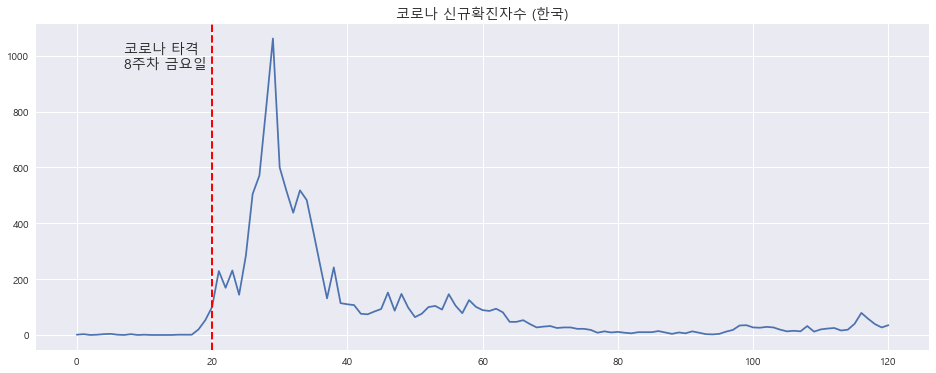

In [25]:
graph_corona_time_plot(covid)

# 업종 별 EDA

# __ __ __ __ __ __ __ __ __ __ __ __ __ __ __

In [26]:
offline = pd.read_csv("CARD_SPENDING_RESIDENT_KOR.csv")
offline.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,AVG_AMT,YEAR,MONTH,DAY,YEAR_MONTH
0,20190201,대구 중구,동인동,숙박,F,25,11,595,54.090909,2019,2,1,201902
1,20190201,대구 중구,동인동,숙박,F,50,5,243,48.600000,2019,2,1,201902
2,20190201,대구 중구,동인동,숙박,F,55,5,27,5.400000,2019,2,1,201902
3,20190201,대구 중구,동인동,숙박,M,20,11,243,22.090909,2019,2,1,201902
4,20190201,대구 중구,동인동,숙박,M,25,11,433,39.363636,2019,2,1,201902


In [27]:
# 요일 계산 (dt.dayofweek를 통해 해당 날짜의 요일을 반환할 수 있음.)
weekdays = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
offline['STD_DD'] = pd.to_datetime(offline.STD_DD, format='%Y%m%d')
offline['WEEKDAY'] = offline.STD_DD.dt.dayofweek.apply(lambda x : '_'.join([str(x),weekdays.get(x)]))
offline.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,AVG_AMT,YEAR,MONTH,DAY,YEAR_MONTH,WEEKDAY
0,2019-02-01,대구 중구,동인동,숙박,F,25,11,595,54.090909,2019,2,1,201902,4_금
1,2019-02-01,대구 중구,동인동,숙박,F,50,5,243,48.600000,2019,2,1,201902,4_금
2,2019-02-01,대구 중구,동인동,숙박,F,55,5,27,5.400000,2019,2,1,201902,4_금
3,2019-02-01,대구 중구,동인동,숙박,M,20,11,243,22.090909,2019,2,1,201902,4_금
4,2019-02-01,대구 중구,동인동,숙박,M,25,11,433,39.363636,2019,2,1,201902,4_금


In [28]:
# 주차 계산 (마찬가지로 dt.weekofyear을 통해 해당 날짜의 주차를 알 수 있음.)
offline['WEEK_NUM'] = offline['STD_DD'].dt.weekofyear
offline.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,AVG_AMT,YEAR,MONTH,DAY,YEAR_MONTH,WEEKDAY,WEEK_NUM
0,2019-02-01,대구 중구,동인동,숙박,F,25,11,595,54.090909,2019,2,1,201902,4_금,5
1,2019-02-01,대구 중구,동인동,숙박,F,50,5,243,48.600000,2019,2,1,201902,4_금,5
2,2019-02-01,대구 중구,동인동,숙박,F,55,5,27,5.400000,2019,2,1,201902,4_금,5
3,2019-02-01,대구 중구,동인동,숙박,M,20,11,243,22.090909,2019,2,1,201902,4_금,5
4,2019-02-01,대구 중구,동인동,숙박,M,25,11,433,39.363636,2019,2,1,201902,4_금,5


In [29]:
print(set(offline['MCT_CAT_CD']))

{'가전', '요식업소', '주방용구', '연료판매', '보건위생', '광학제품', '레저용품', '문화취미', '수리서비스', '자동차판매', '의료기관', '서적문구', '유통업', '음료식품', '직물', '자동차 정비', '전기', '신변잡화', '사무통신', '가구', '레저업소', '숙박', '의복'}


# 특정 업종 선택 (사무통신)

## 1. 전년 대비 동월 비교

In [30]:
def graph_by_year_month_offline(category_name):
    # 카테고리에 속하는 데이터 뽑기
    category_df = offline.loc[offline['MCT_CAT_CD']==category_name, :]
    # YEAR, MONTH로 묶고 AMT, CNT 합 구하기
    category_df = category_df.groupby(['YEAR', 'MONTH'])[['USE_AMT', 'USE_CNT']].sum().reset_index()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    sns.barplot(x=category_df['MONTH'], y=category_df['USE_CNT'], hue='YEAR', data=category_df, ax=axes[0])
    sns.barplot(x=category_df['MONTH'], y=category_df['USE_AMT'], hue='YEAR', data=category_df, ax=axes[1])
    axes[0].set_title(category_name + "의 월별 소비횟수")
    axes[1].set_title(category_name + "의 월별 소비금액")

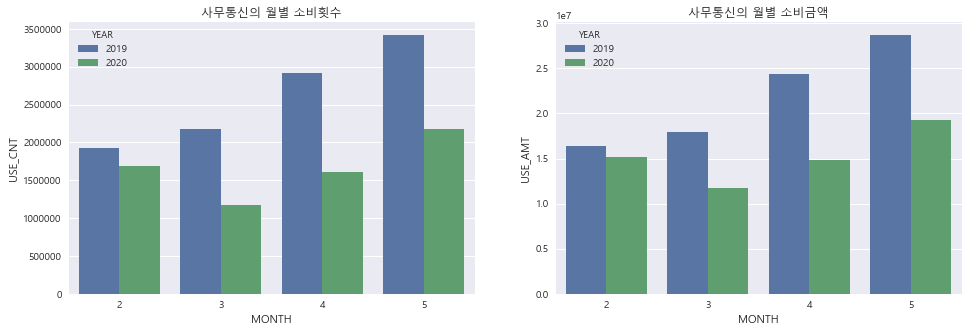

In [31]:
graph_by_year_month_offline("사무통신")

## 2. 연령 별로 시간에 따른 변화율 관찰

### (1) 19년과 20년의 월별 비중 변화

In [32]:
def graph_by_year_month_offline(category_name, hue_column):
    # 카테고리에 해당하는 데이터 뽑기
    category_df = offline.loc[offline['MCT_CAT_CD']==category_name, :]
    # YEAR_MONTH별로 CNT, AMT 합 구하기
    category_df = category_df.groupby(['YEAR_MONTH', hue_column])[['USE_CNT', 'USE_AMT']].sum().reset_index()
    # graph 화면을 2개의 row와 1개의 column으로 분할하기.
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
    # 막대 그래프를 그릴 때, x축과 y축을 설정하고, hue는 분할 기준, ax는 그림의 위치
    sns.barplot(x='YEAR_MONTH', y='USE_CNT', hue=hue_column, data=category_df, ax=axes[0])
    sns.barplot(x='YEAR_MONTH', y='USE_AMT', hue=hue_column, data=category_df, ax=axes[1])
    # 그림에 제목을 달자.
    axes[0].set_title(category_name + "의 {}별 소비횟수".format(hue_column))
    axes[1].set_title(category_name + "의 {}별 소비금액".format(hue_column))
    # 범례를 추가하되, 위치까지 설정.
    axes[0].legend(loc='lower right')
    axes[1].legend(loc='lower right')
    # 수직라인을 그리되, x축의 위치 설정, 색깔, 선의 굵기, 선 스타일 설정.
    axes[0].axvline(x=3.5, color='r', linewidth=2, linestyle='--')
    axes[1].axvline(x=3.5, color='r', linewidth=2, linestyle='--')

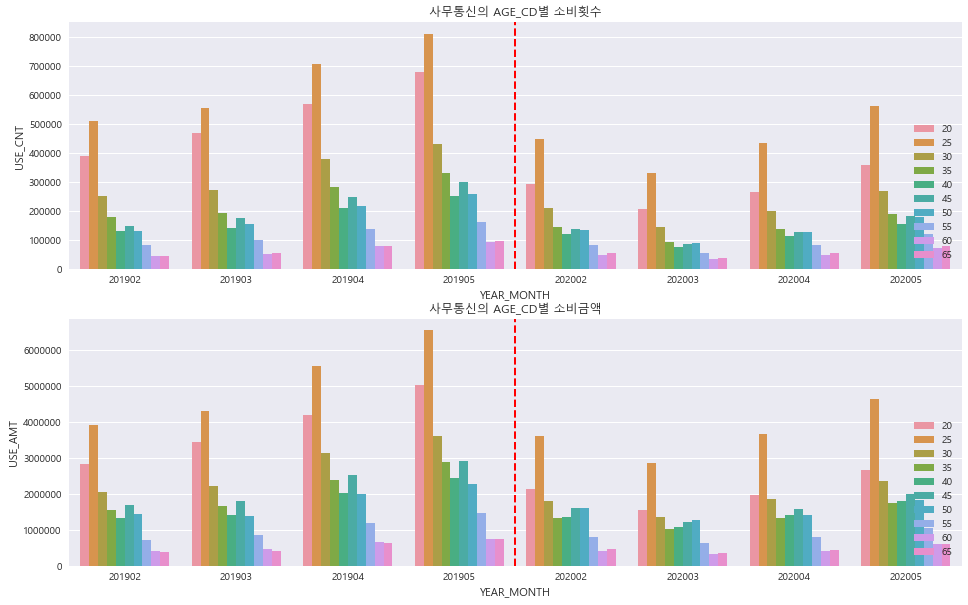

In [33]:
graph_by_year_month_offline("사무통신", "AGE_CD")

### (2) 19년과 20년의 주별 비중 변화

In [34]:
def graph_by_month_number_offline(category_name, hue_column):
    # 카테고리에 해당하는 데이터 뽑기
    category_df = offline.loc[offline['MCT_CAT_CD']==category_name, :]
    # 주차별로 CNT, AMT 합 구하기
    category_df = category_df.groupby(['YEAR', 'WEEK_NUM', hue_column])[['USE_CNT', 'USE_AMT']].sum().reset_index()
    df_2019 = category_df.query('YEAR==2019')
    df_2020 = category_df.query('YEAR==2020')
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 20))
    sns.barplot(x='WEEK_NUM', y='USE_CNT', hue=hue_column, data=df_2019, ax=axes[0])
    sns.barplot(x='WEEK_NUM', y='USE_CNT', hue=hue_column, data=df_2020, ax=axes[1])
    sns.barplot(x='WEEK_NUM', y='USE_AMT', hue=hue_column, data=df_2019, ax=axes[2])
    sns.barplot(x='WEEK_NUM', y='USE_AMT', hue=hue_column, data=df_2020, ax=axes[3])
    
    aggregate_columns = ['USE_CNT', 'USE_AMT']
    years = [2019, 2020]
    for i in [0, 1, 2, 3]:
        axes[i].set_title(category_name + "{}년의 {}별 {}".format(years[i%2], hue_column, aggregate_columns[i//2]))
        axes[i].legend(loc='lower right')
        axes[i].set_ylim([0, category_df[aggregate_columns[i//2]].max()*1.1])
        axes[i].axvline(x=2.5, color='r', linewidth=2, linestyle='--')
        axes[i].axvline(x=6.5, color='r', linewidth=2, linestyle='--')
        axes[i].axvline(x=14.5, color='g', linewidth=2, linestyle='--')
        axes[i].text(x=2.5, y=category_df[aggregate_columns[i//2]].max()*0.9, s="　코로나 확산기(8~11주)")
        axes[i].text(x=14.5, y=category_df[aggregate_columns[i//2]].max()*0.9, s="　재난지원금 지급주")

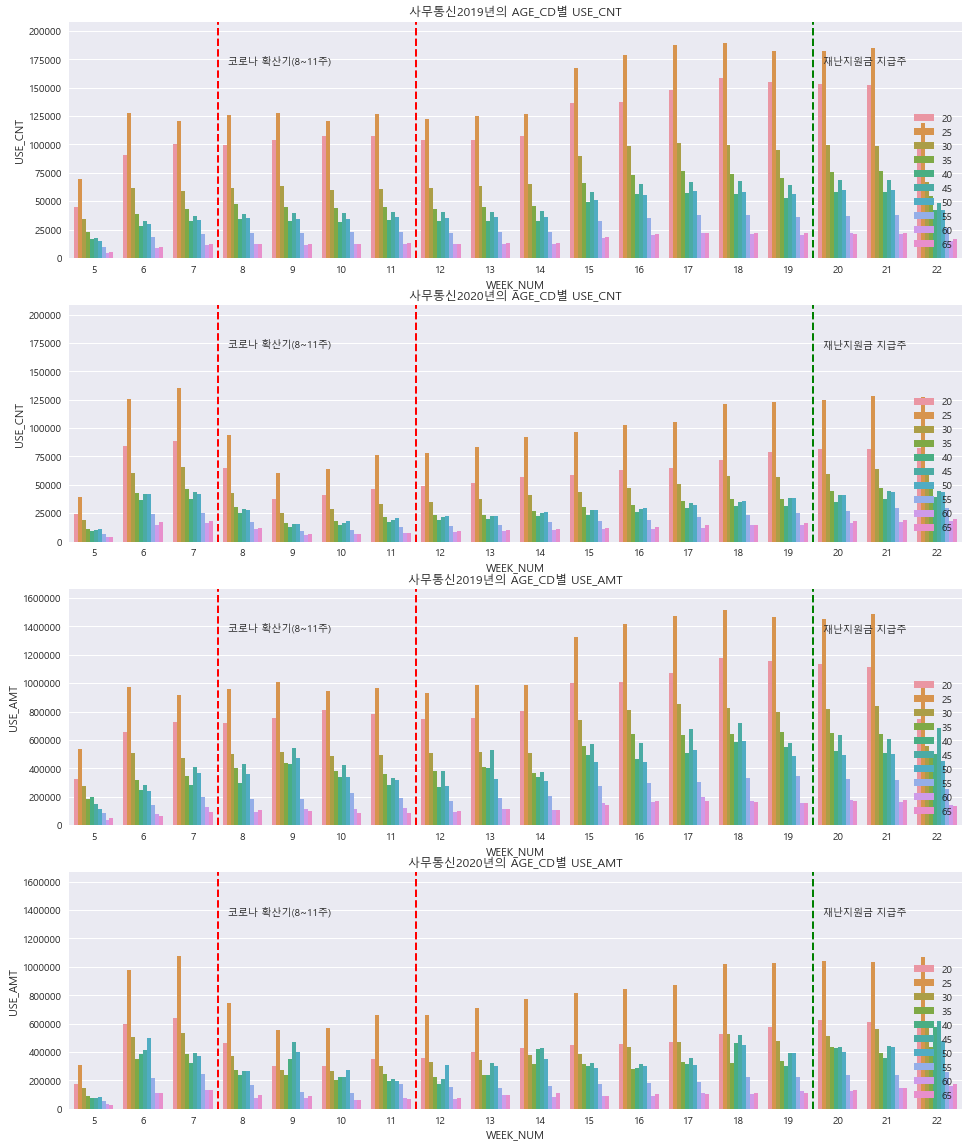

In [35]:
graph_by_month_number_offline("사무통신", "AGE_CD")

### (3) 19년과 20년의 요일별 비중 변화

In [36]:
def graph_by_weekday_offline(category_name, hue_column):
    # 카테고리에 해당하는 데이터 뽑기
    category_df = offline.loc[offline['MCT_CAT_CD']==category_name, :]
    # 년도 + 요일별로 CNT, AMT 합 구하기
    category_df = category_df.groupby(['YEAR', 'WEEKDAY', hue_column])[['USE_CNT', 'USE_AMT']].sum().reset_index()
    df_2019 = category_df.query('YEAR==2019')
    df_2020 = category_df.query('YEAR==2020')
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
    sns.barplot(x=hue_column, y='USE_CNT', hue='WEEKDAY', data=df_2019, ax=axes[0][0])
    sns.barplot(x=hue_column, y='USE_CNT', hue='WEEKDAY', data=df_2020, ax=axes[0][1])
    sns.barplot(x=hue_column, y='USE_AMT', hue='WEEKDAY', data=df_2019, ax=axes[1][0])
    sns.barplot(x=hue_column, y='USE_AMT', hue='WEEKDAY', data=df_2020, ax=axes[1][1])
    
    aggregate_columns = ['USE_CNT', 'USE_AMT']
    years = [2019, 2020]
    for i in [0, 1]:
        for j in [0, 1]:
            axes[i][j].set_ylim([0, df_2019[aggregate_columns[i]].max()*1.1])
            axes[i][j].set_title("{}년 요일별 {}".format(years[j], aggregate_columns[i]))

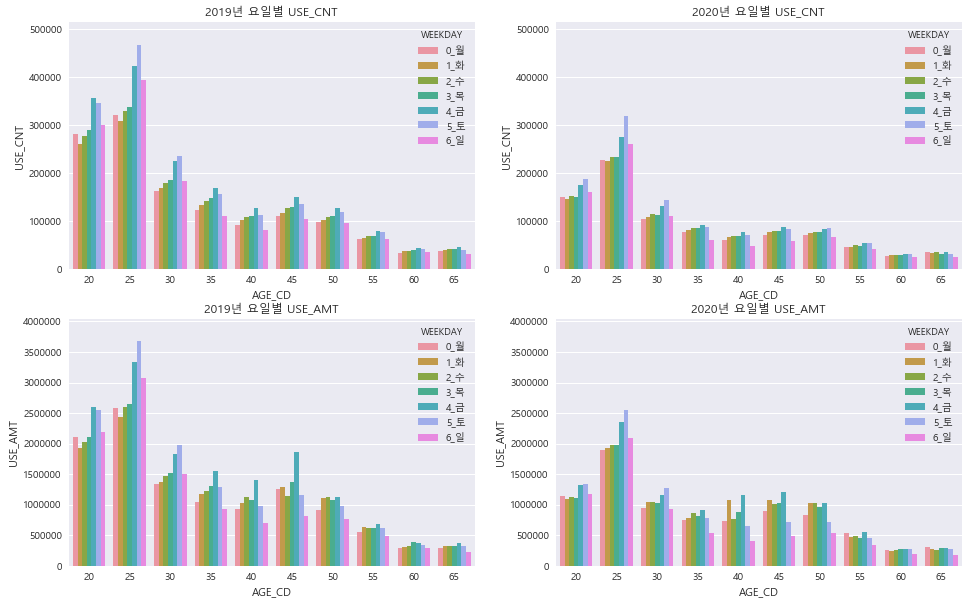

In [37]:
graph_by_weekday_offline("사무통신", "AGE_CD")

## 2. 성별 별로 시간에 따른 변화율 관찰

### (1) 19년과 20년의 월별 비중 변화

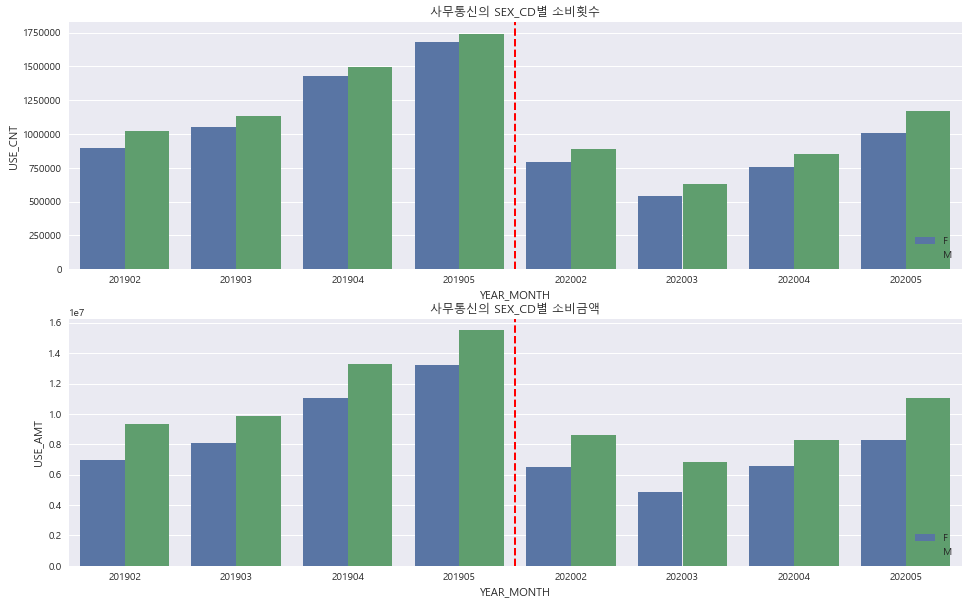

In [38]:
graph_by_year_month_offline("사무통신", "SEX_CD")

### (2) 19년과 20년의 주별 비중 변화

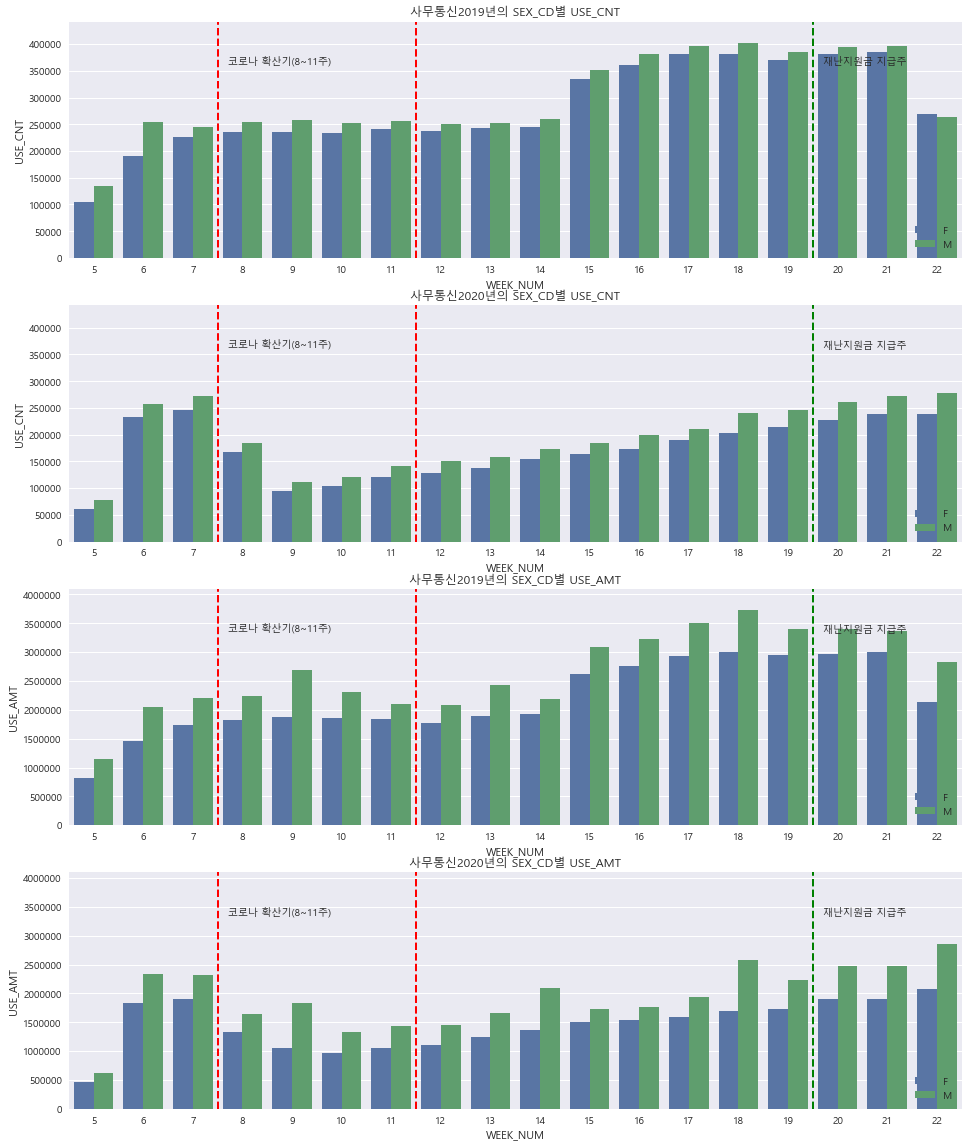

In [39]:
graph_by_month_number_offline("사무통신", "SEX_CD")

### (3) 19년과 20년의 요일별 비중 변화

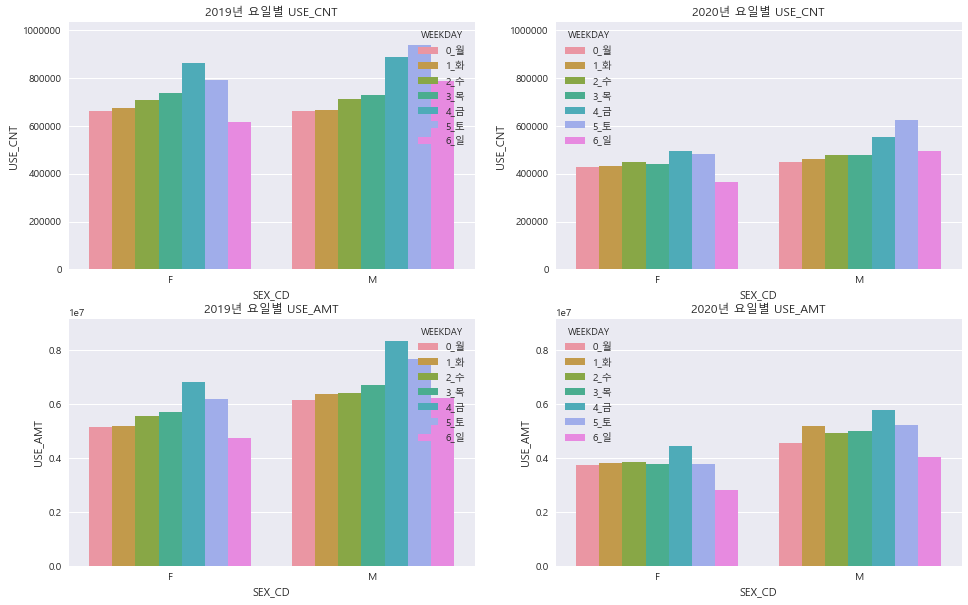

In [40]:
graph_by_weekday_offline("사무통신", "SEX_CD")

## 3. 전체적인 주차별 흐름 관찰

In [41]:
def graph_by_weeknum_offline(category_name, aggregate_column):
    # 지역별 주별 평균을 구하고 -> 이것을 업종별로 합해서 그 업종 추이를 보고자 하였다
    week_df = offline.groupby(['MCT_CAT_CD', 'GU_CD', 'DONG_CD', 'YEAR', 'WEEK_NUM', 'SEX_CD', 'AGE_CD'])[[aggregate_column]].mean().reset_index()
    week_df = week_df.groupby(['MCT_CAT_CD', 'YEAR', 'WEEK_NUM'])[[aggregate_column]].sum().reset_index()
    week_df = week_df.loc[week_df['MCT_CAT_CD']==category_name, :]
    
    max_date_num_week = datetime(2020, 3, 1).isocalendar()[1]
    disaster_support_date_num_week = datetime(2020, 5, 13).isocalendar()[1]

    plt.figure(figsize=(16, 5))
    ax = sns.lineplot(x='WEEK_NUM', y=aggregate_column, hue='YEAR', data=week_df, palette="Set2")
    ax.set_xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
    ax.legend([2019, 2020])
    ax.axvline(x=max_date_num_week, color='r', linewidth=2, linestyle='--')
    ax.axvline(x=disaster_support_date_num_week, color='g', linewidth=2, linestyle='--')
    ax.set_ylim([0, week_df[aggregate_column].max()*1.1])
    ax.text(x=max_date_num_week, 
         y=week_df.query('YEAR==2020')[aggregate_column].min(), 
         s='　코로나 신규 확진자수 최고\n　(2020.03.01)',
         fontsize=12)
    ax.text(x=disaster_support_date_num_week, 
         y=week_df.query('YEAR==2020')[aggregate_column].min(), 
         s='　재난지원금\n　(2020.05.13)',
         fontsize=12)
    ax.set_title("주차별 {} {}".format(category_name, aggregate_column.upper()), fontsize=12)
    
    
def graph_by_weeknum_with_hue_offline(category_name, aggregate_column, hue_column):
    week_df = offline.groupby(['MCT_CAT_CD', 'GU_CD', 'DONG_CD', 'YEAR', 'WEEK_NUM', 'SEX_CD', 'AGE_CD'])[[aggregate_column]].mean().reset_index()
    week_df = week_df.groupby(['MCT_CAT_CD', 'YEAR', 'WEEK_NUM', hue_column])[[aggregate_column]].sum().reset_index()
    week_df = week_df.loc[week_df['MCT_CAT_CD']==category_name, :]
    
    max_date_num_week = datetime(2020, 3, 1).isocalendar()[1]
    disaster_support_date_num_week = datetime(2020, 5, 13).isocalendar()[1]

    year_2019_df = week_df.loc[week_df['YEAR']==2019, :]
    year_2020_df = week_df.loc[week_df['YEAR']==2020, :]

    max_date_num_week = datetime(2020, 3, 1).isocalendar()[1]
    disaster_support_date_num_week = datetime(2020, 5, 13).isocalendar()[1]
    hue_columns = list(set(week_df[hue_column]))
    hue_columns.sort()
    len_rows = len(set(week_df[hue_column]))

    fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
    sns.lineplot(x='WEEK_NUM', y=aggregate_column, hue=hue_column, data=year_2019_df, palette="Set2", ax=axes[0])
    sns.lineplot(x='WEEK_NUM', y=aggregate_column, hue=hue_column, data=year_2020_df, palette="Set2", ax=axes[1])
    for i in [0, 1]:
        year = 2019 if i==0 else 2020
        axes[i].set_ylim([0, week_df[aggregate_column].max()*1.1])
        axes[i].legend(loc='lower left')
        axes[i].set_xticks(list(set(week_df['WEEK_NUM'])))
        axes[i].axvline(x=max_date_num_week, color='r', linewidth=2, linestyle='--')
        axes[i].axvline(x=disaster_support_date_num_week, color='g', linewidth=2, linestyle='--')
        axes[i].set_title("{}년도".format(year))

    fig, axes = plt.subplots(nrows=len_rows, figsize=(16, 5*len_rows))
    for i, select in enumerate(hue_columns):
        temp_2019 = year_2019_df.loc[year_2019_df[hue_column]==select, :]
        temp_2020 = year_2020_df.loc[year_2020_df[hue_column]==select, :]

        sns.lineplot(x='WEEK_NUM', y=aggregate_column, data=temp_2019, ax=axes[i], palette='Set2')
        sns.lineplot(x='WEEK_NUM', y=aggregate_column, data=temp_2020, ax=axes[i], palette='Set2')
        axes[i].set_ylim(0, max([temp_2019[aggregate_column].max(), temp_2020[aggregate_column].max()])*1.1)
        axes[i].set_xticks(list(set(week_df['WEEK_NUM'])))
        axes[i].legend([2019, 2020], loc='upper left')
        axes[i].axvline(x=max_date_num_week, color='r', linewidth=2, linestyle='--')
        axes[i].axvline(x=disaster_support_date_num_week, color='g', linewidth=2, linestyle='--')
        axes[i].set_title(select)
        axes[i].text(x=max_date_num_week, 
                     y=min([temp_2019[aggregate_column].min(), temp_2020[aggregate_column].min()]), 
                     s='　코로나 신규 확진자수 최고\n　(2020.03.01)',
                     fontsize=12)
        axes[i].text(x=disaster_support_date_num_week, 
                     y=min([temp_2019[aggregate_column].min(), temp_2020[aggregate_column].min()]), 
                     s='　재난지원금\n　(2020.05.13)',
                     fontsize=12)

    plt.show()

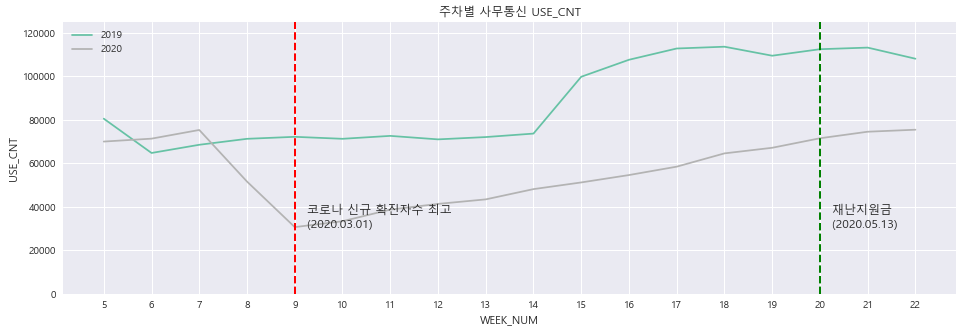

In [42]:
graph_by_weeknum_offline("사무통신", "USE_CNT")

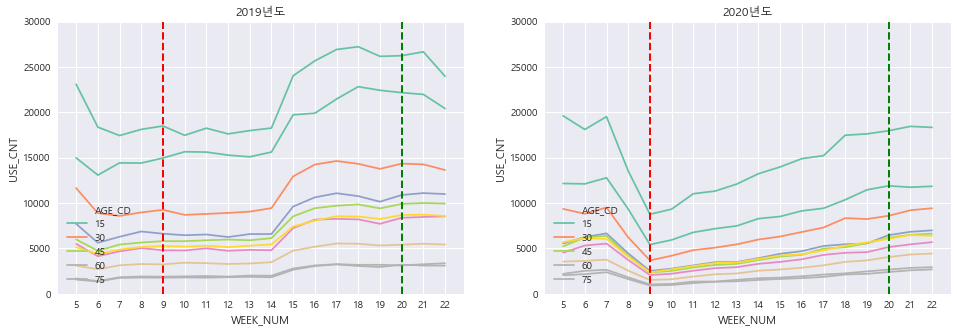

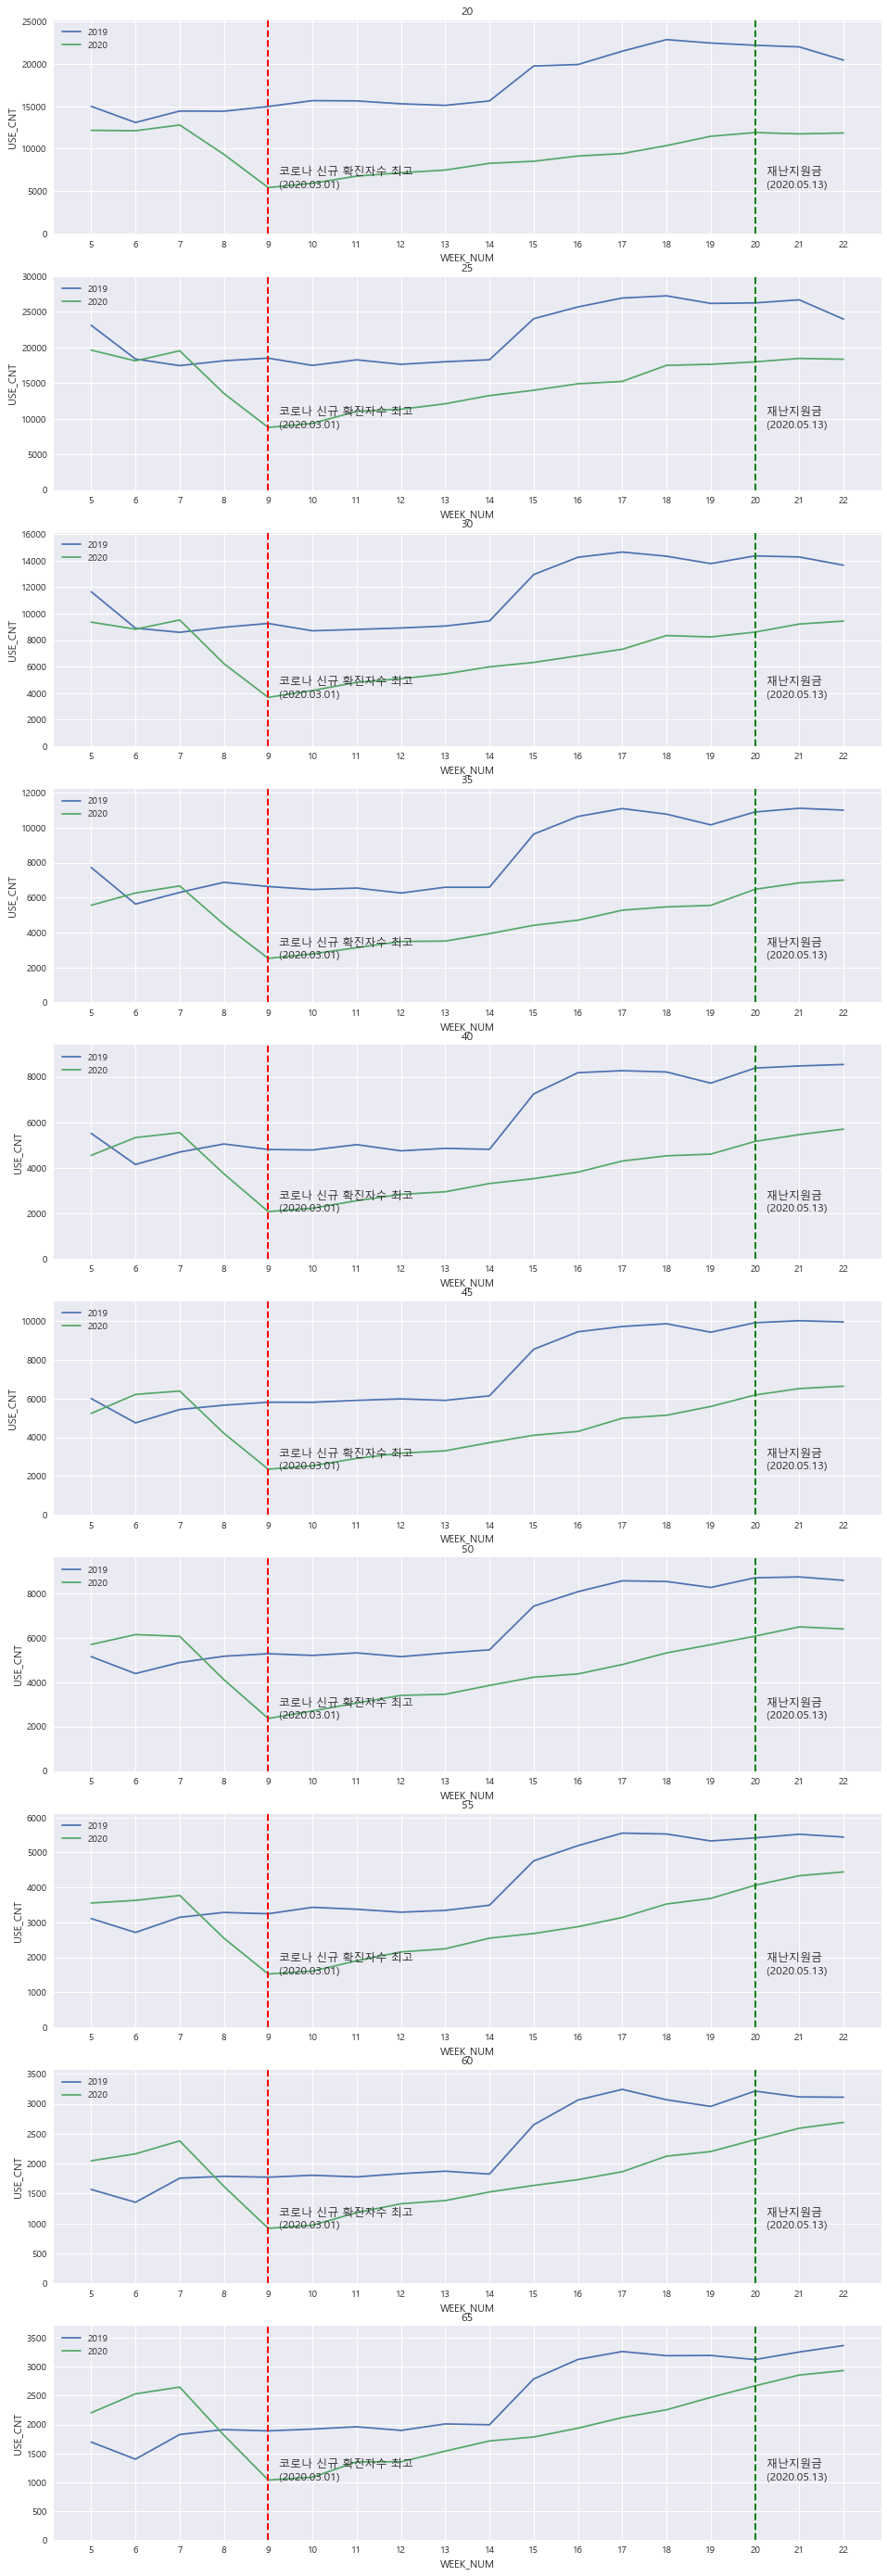

In [43]:
graph_by_weeknum_with_hue_offline("사무통신", "USE_CNT", "AGE_CD")

# Risk Index

In [44]:
group_col='MCT_CAT_CD'
val='USE_CNT'

In [45]:
def impact_index(df, region_col = 'GU_CD',group_col='MCT_CAT_CD', val='USE_CNT'):
    cat_list = df[group_col].unique().tolist()
    impact_index_dict = {}
    
    for cat in cat_list:
        tmp_df = df.loc[offline[group_col]== cat]
        
        tmp_2019 = tmp_df.query('YEAR==2019').reset_index(drop=True)
        tmp_2020 = tmp_df.query('YEAR==2020').reset_index(drop=True)
        tmp_2019 = tmp_2019.groupby(['STD_DD','YEAR','MONTH', 'DAY', 'WEEK_NUM','WEEKDAY'])[val].sum().reset_index()
        tmp_2020 = tmp_2020.groupby(['STD_DD','YEAR','MONTH', 'DAY', 'WEEK_NUM','WEEKDAY'])[val].sum().reset_index()
        
        ### 코로나 터지기 2주전 시점의 평균
        pre_2019 = tmp_2019.iloc[7:21,6].mean()
        pre_2020 = tmp_2020.iloc[6:20,6].mean()
        
        ### 이동 평균선 (7일) 구하기
        tmp_2019[val] = round(tmp_2019[val].rolling(window=7, center = True).mean(),2)
        tmp_2020[val] = round(tmp_2020[val].rolling(window=7, center = True).mean(),2)
        
        ### 두 데이터프레임의 index 맞추기.
        tmp_2019 = tmp_2019.loc[tmp_2019['WEEK_NUM']>6, ]
        tmp_2019 = tmp_2019.loc[tmp_2019['WEEK_NUM']<22, ].reset_index(drop = True)
        tmp_2020 = tmp_2020.loc[tmp_2020['WEEK_NUM']>6, ]
        tmp_2020 = tmp_2020.loc[tmp_2020['WEEK_NUM']<22, ].reset_index(drop = True)
        
        ### 가장 낮아진 시점 구하기.
        T = np.argmin(tmp_2020['USE_CNT'])
        
        ### Impact index 계산
        post_2020 = tmp_2020.iloc[T, 6]
        r1 = (pre_2020 - post_2020) / pre_2020
        print("2020년에 코로나 터지기 전 평균: {}, 터진 후 최소: {} -> r1 = {}".format(pre_2020, post_2020, r1))
        post_2019 = tmp_2019.iloc[T, 6]
        r2 = (pre_2019 - post_2019) / pre_2019
        print("2019년에 코로나 터지기 전 평균: {}, 터진 후 최소: {} -> r2 = {}".format(pre_2019, post_2019, r2))
        impact_index = round((r1 - r2)/(r2+1),3)
        print("{} 업종의 Impact index = {}".format(cat,impact_index))
        print("________________________________________________")
   
        impact_index_dict[cat] = impact_index

    return  impact_index_dict

# Impact index with city

In [52]:
offline['Region'] = offline['GU_CD'].str[0:2]

In [51]:
offline['Region']

0          대구
1          대구
2          대구
3          대구
4          대구
5          대구
6          대구
7          대구
8          대구
9          대구
10         대구
11         대구
12         대구
13         대구
14         대구
15         대구
16         대구
17         대구
18         대구
19         대구
20         대구
21         대구
22         대구
23         대구
24         대구
25         대구
26         대구
27         대구
28         대구
29         대구
           ..
2537723    서울
2537724    서울
2537725    서울
2537726    서울
2537727    서울
2537728    서울
2537729    서울
2537730    서울
2537731    서울
2537732    서울
2537733    서울
2537734    서울
2537735    서울
2537736    서울
2537737    서울
2537738    서울
2537739    서울
2537740    서울
2537741    서울
2537742    서울
2537743    서울
2537744    서울
2537745    서울
2537746    서울
2537747    서울
2537748    서울
2537749    서울
2537750    서울
2537751    서울
2537752    서울
Name: Region, Length: 2537753, dtype: object

In [53]:
offline

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,AVG_AMT,YEAR,MONTH,DAY,YEAR_MONTH,WEEKDAY,WEEK_NUM,Region
0,2019-02-01,대구 중구,동인동,숙박,F,25,11,595,54.090909,2019,2,1,201902,4_금,5,대구
1,2019-02-01,대구 중구,동인동,숙박,F,50,5,243,48.600000,2019,2,1,201902,4_금,5,대구
2,2019-02-01,대구 중구,동인동,숙박,F,55,5,27,5.400000,2019,2,1,201902,4_금,5,대구
3,2019-02-01,대구 중구,동인동,숙박,M,20,11,243,22.090909,2019,2,1,201902,4_금,5,대구
4,2019-02-01,대구 중구,동인동,숙박,M,25,11,433,39.363636,2019,2,1,201902,4_금,5,대구
5,2019-02-01,대구 중구,동인동,숙박,M,30,11,460,41.818182,2019,2,1,201902,4_금,5,대구
6,2019-02-01,대구 중구,동인동,레저용품,M,50,5,454,90.800000,2019,2,1,201902,4_금,5,대구
7,2019-02-01,대구 중구,동인동,레저업소,F,50,5,146,29.200000,2019,2,1,201902,4_금,5,대구
8,2019-02-01,대구 중구,동인동,레저업소,M,20,5,43,8.600000,2019,2,1,201902,4_금,5,대구
9,2019-02-01,대구 중구,동인동,레저업소,M,25,16,103,6.437500,2019,2,1,201902,4_금,5,대구


In [58]:
def impact_index(df, group_col='MCT_CAT_CD', val='USE_CNT'):
    cat_list = df[group_col].unique().tolist()
    impact_index_dict_Seoul = {}
    impact_index_dict_Daegu = {}
    
    for cat in cat_list:
        tmp_df = df.loc[offline[group_col]== cat]
        
        tmp_2019 = tmp_df.query('YEAR==2019').reset_index(drop=True)
        tmp_2020 = tmp_df.query('YEAR==2020').reset_index(drop=True)
        tmp_2019 = tmp_2019.groupby(['STD_DD','YEAR','MONTH', 'DAY', 'WEEK_NUM','WEEKDAY', 'Region'])[val].sum().reset_index()
        tmp_2020 = tmp_2020.groupby(['STD_DD','YEAR','MONTH', 'DAY', 'WEEK_NUM','WEEKDAY', 'Region'])[val].sum().reset_index()
        
        tmp_2019_Seoul = tmp_2019.loc[tmp_2019['Region'] == '서울'].reset_index(drop = True)
        tmp_2019_Daegu = tmp_2019.loc[tmp_2019['Region'] == '대구'].reset_index(drop = True)
        tmp_2020_Seoul = tmp_2020.loc[tmp_2020['Region'] == '서울'].reset_index(drop = True)
        tmp_2020_Daegu = tmp_2020.loc[tmp_2020['Region'] == '대구'].reset_index(drop = True)
               
        ### 코로나 터지기 2주전 시점의 평균
        pre_2019_Seoul = tmp_2019_Seoul.iloc[7:21,7].mean()
        pre_2019_Daegu = tmp_2019_Daegu.iloc[7:21,7].mean()        
        pre_2020_Seoul = tmp_2020_Seoul.iloc[6:20,7].mean()
        pre_2020_Daegu = tmp_2020_Daegu.iloc[6:20,7].mean()
        
        ### 이동 평균선 (7일) 구하기
        tmp_2019_Seoul['USE_CNT'] = round(tmp_2019_Seoul['USE_CNT'].rolling(window=7, center = True).mean(),2)
        tmp_2019_Daegu['USE_CNT'] = round(tmp_2019_Daegu['USE_CNT'].rolling(window=7, center = True).mean(),2)
        tmp_2020_Seoul['USE_CNT'] = round(tmp_2020_Seoul['USE_CNT'].rolling(window=7, center = True).mean(),2)
        tmp_2020_Daegu['USE_CNT'] = round(tmp_2020_Daegu['USE_CNT'].rolling(window=7, center = True).mean(),2)
        
        ### 두 데이터프레임의 index 맞추기.
        tmp_2019_Seoul = tmp_2019_Seoul.loc[tmp_2019_Seoul['WEEK_NUM']>6, ]
        tmp_2019_Seoul = tmp_2019_Seoul.loc[tmp_2019_Seoul['WEEK_NUM']<22, ].reset_index(drop = True)
        tmp_2019_Daegu = tmp_2019_Daegu.loc[tmp_2019_Daegu['WEEK_NUM']>6, ]
        tmp_2019_Daegu = tmp_2019_Daegu.loc[tmp_2019_Daegu['WEEK_NUM']<22, ].reset_index(drop = True)

        tmp_2020_Seoul = tmp_2020_Seoul.loc[tmp_2020_Seoul['WEEK_NUM']>6, ]
        tmp_2020_Seoul = tmp_2020_Seoul.loc[tmp_2020_Seoul['WEEK_NUM']<22, ].reset_index(drop = True)
        tmp_2020_Daegu = tmp_2020_Daegu.loc[tmp_2020_Daegu['WEEK_NUM']>6, ]
        tmp_2020_Daegu = tmp_2020_Daegu.loc[tmp_2020_Daegu['WEEK_NUM']<22, ].reset_index(drop = True)
        
        ### 코로나 발생 후 1달 동안 가장 낮아진 시점 구하기.
        T_Seoul = np.argmin(tmp_2020_Seoul['USE_CNT'][7:38])
        T_Daegu = np.argmin(tmp_2020_Daegu['USE_CNT'][7:38])
        print(T_Seoul)
        ### Plot 그리기
        ax = tmp_2020_Seoul['USE_CNT'].plot(figsize=(16, 6))
        ax.axvline(x=T_Seoul, color='r', linewidth=2, linestyle='--')
        ax.axvline(x=7, color='r', linewidth=2, linestyle='--')
        plt.title("{} 업종이 서울 지역에서 타격까지 걸리는 시간 = {}".format(cat,(T_Seoul-7)), fontsize=14)
        plt.show()
        
        ax = tmp_2020_Daegu['USE_CNT'].plot(figsize=(16, 6))
        ax.axvline(x=T_Daegu, color='r', linewidth=2, linestyle='--')
        ax.axvline(x=7, color='r', linewidth=2, linestyle='--')
        plt.title("{} 업종이 대구 지역에서 타격까지 걸리는 시간 = {}".format(cat,(T_Daegu-7)), fontsize=14)
        plt.show()
                               
        ### Impact index 계산
        post_2020_Seoul = tmp_2020_Seoul.iloc[T_Seoul, 7]
        post_2020_Daegu = tmp_2020_Daegu.iloc[T_Daegu, 7]
        r1_Seoul = (pre_2020_Seoul - post_2020_Seoul) / pre_2020_Seoul
        print("서울의 2020년에 코로나 터지기 전 평균: {}, 터진 후 최소: {} -> r1 = {}".format(pre_2020_Seoul, post_2020_Seoul, r1_Seoul))
        post_2019_Seoul = tmp_2019_Seoul.iloc[T_Seoul, 7]
        post_2019_Daegu = tmp_2019_Daegu.iloc[T_Daegu, 7]
        r2_Seoul = (pre_2019_Seoul - post_2019_Seoul) / pre_2019_Seoul
        print("서울의 2019년에 코로나 터지기 전 평균: {}, 터진 후 최소: {} -> r2 = {}".format(pre_2019_Seoul, post_2019_Seoul, r2_Seoul))
        impact_index_Seoul = round((r1_Seoul - r2_Seoul)/(r2_Seoul + 1),3)
        print("{} 업종의 서울 Impact index = {}".format(cat,impact_index_Seoul))
        
        r1_Daegu = (pre_2020_Daegu - post_2020_Daegu) / pre_2020_Daegu
        print("대구의 2020년에 코로나 터지기 전 평균: {}, 터진 후 최소: {} -> r1 = {}".format(pre_2020_Daegu, post_2020_Daegu, r1_Daegu))
        r2_Daegu = (pre_2019_Daegu - post_2019_Daegu) / pre_2019_Daegu
        print("대구의 2019년에 코로나 터지기 전 평균: {}, 터진 후 최소: {} -> r2 = {}".format(pre_2019_Daegu, post_2019_Daegu, r2_Daegu))
        impact_index_Daegu = round((r1_Daegu - r2_Daegu)/(r2_Daegu + 1),3)
        print("{} 업종의 대구 Impact index = {}".format(cat,impact_index_Daegu))
        print("________________________________________________")
        impact_index_dict_Seoul[cat] = impact_index_Seoul
        impact_index_dict_Daegu[cat] = impact_index_Daegu

    return  impact_index_dict_Seoul, impact_index_dict_Daegu

22


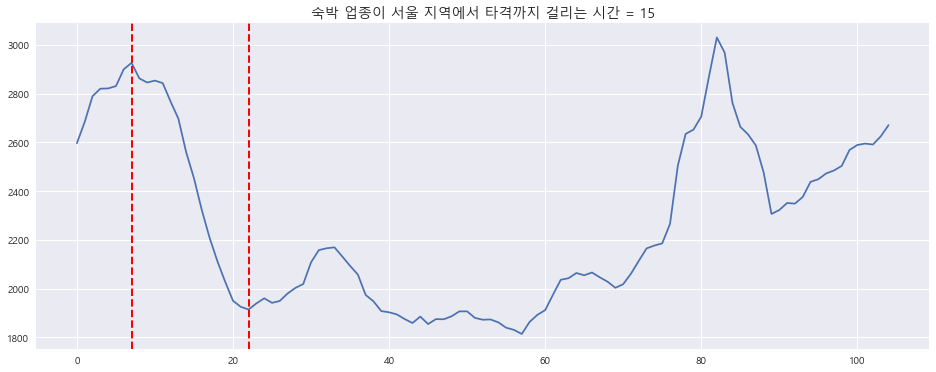

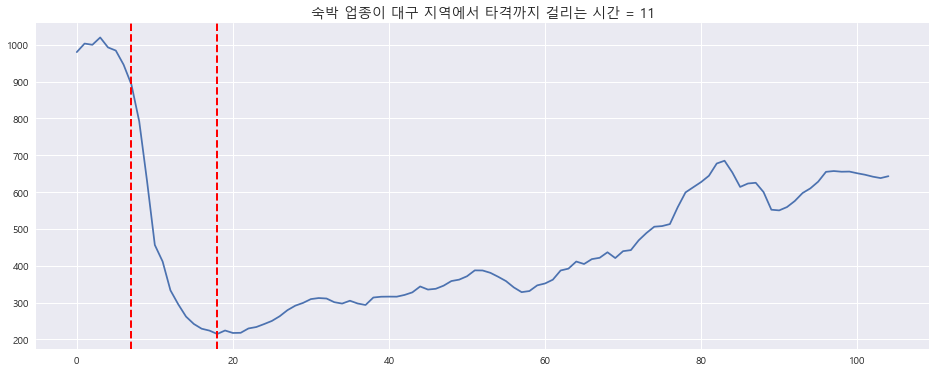

서울의 2020년에 코로나 터지기 전 평균: 2761.714285714286, 터진 후 최소: 1913.86 -> r1 = 0.30700289675150016
서울의 2019년에 코로나 터지기 전 평균: 3263.285714285714, 터진 후 최소: 3028.29 -> r2 = 0.07201199492185789
숙박 업종의 서울 Impact index = 0.219
대구의 2020년에 코로나 터지기 전 평균: 936.0714285714286, 터진 후 최소: 214.71 -> r1 = 0.7706264784433422
대구의 2019년에 코로나 터지기 전 평균: 1010.4285714285714, 터진 후 최소: 1135.86 -> r2 = -0.12413685847589413
숙박 업종의 대구 Impact index = 1.022
________________________________________________
17


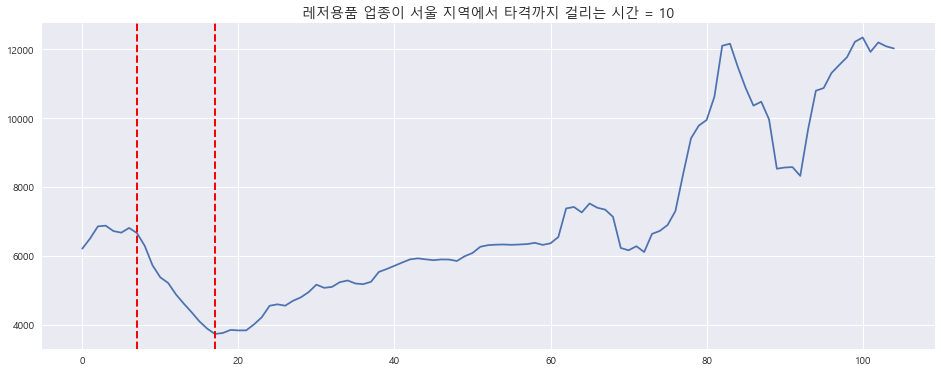

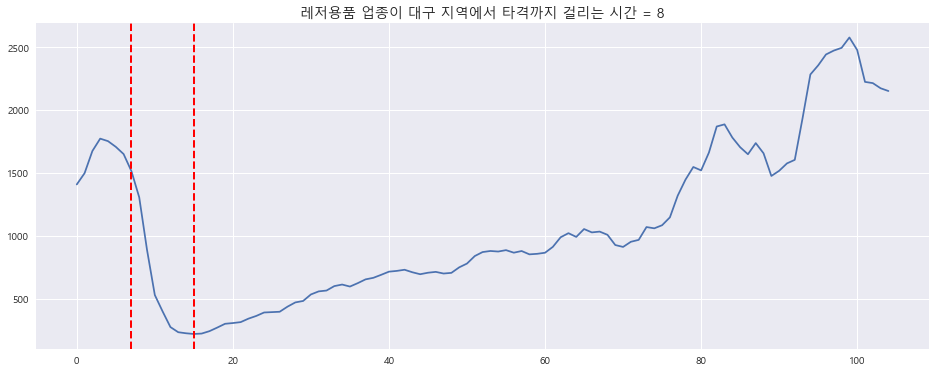

서울의 2020년에 코로나 터지기 전 평균: 6441.857142857143, 터진 후 최소: 3737.0 -> r1 = 0.41988778746146854
서울의 2019년에 코로나 터지기 전 평균: 8340.214285714286, 터진 후 최소: 12950.14 -> r2 = -0.5527346847888456
레저용품 업종의 서울 Impact index = 2.175
대구의 2020년에 코로나 터지기 전 평균: 1461.5714285714287, 터진 후 최소: 217.57 -> r1 = 0.8511396735411983
대구의 2019년에 코로나 터지기 전 평균: 1724.5, 터진 후 최소: 2288.0 -> r2 = -0.32676138011017686
레저용품 업종의 대구 Impact index = 1.75
________________________________________________
37


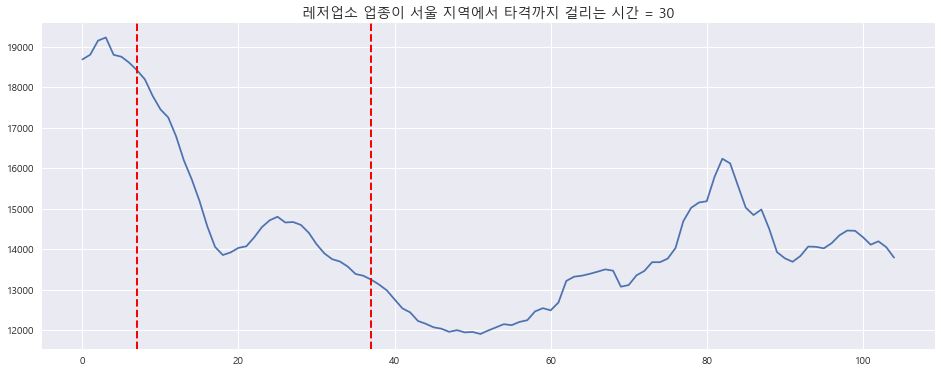

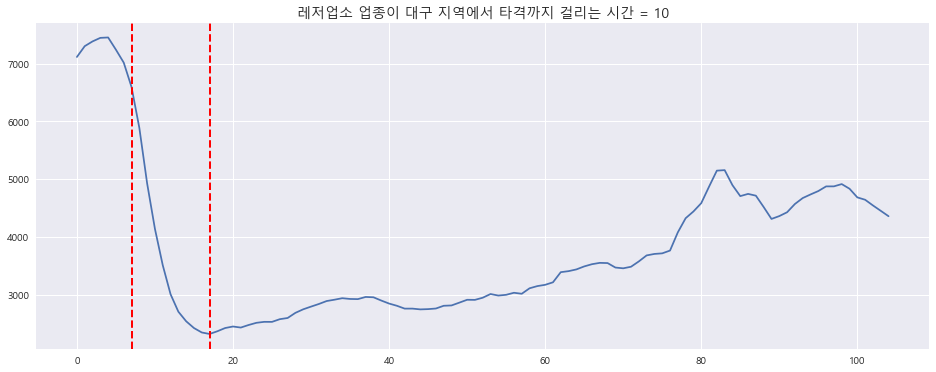

서울의 2020년에 코로나 터지기 전 평균: 18551.64285714286, 터진 후 최소: 13245.71 -> r1 = 0.2860087862838487
서울의 2019년에 코로나 터지기 전 평균: 16885.214285714286, 터진 후 최소: 16089.0 -> r2 = 0.04715452657227586
레저업소 업종의 서울 Impact index = 0.228
대구의 2020년에 코로나 터지기 전 평균: 6857.571428571428, 터진 후 최소: 2317.14 -> r1 = 0.6621048684457221
대구의 2019년에 코로나 터지기 전 평균: 5821.5, 터진 후 최소: 6610.57 -> r2 = -0.13554410375332812
레저업소 업종의 대구 Impact index = 0.923
________________________________________________
18


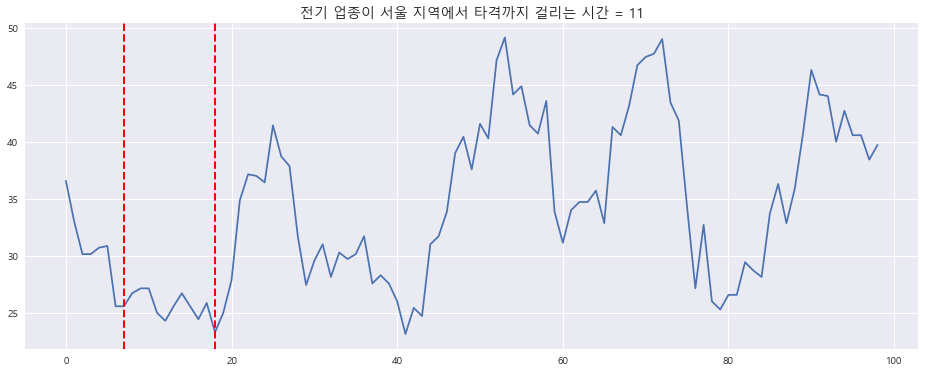

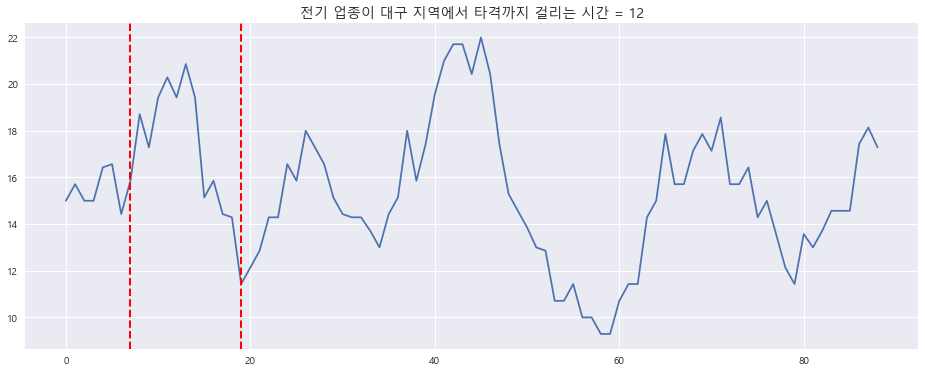

서울의 2020년에 코로나 터지기 전 평균: 31.071428571428573, 터진 후 최소: 23.29 -> r1 = 0.25043678160919547
서울의 2019년에 코로나 터지기 전 평균: 29.0, 터진 후 최소: 28.14 -> r2 = 0.029655172413793084
전기 업종의 서울 Impact index = 0.214
대구의 2020년에 코로나 터지기 전 평균: 17.214285714285715, 터진 후 최소: 11.43 -> r1 = 0.3360165975103735
대구의 2019년에 코로나 터지기 전 평균: 20.0, 터진 후 최소: 14.29 -> r2 = 0.28550000000000003
전기 업종의 대구 Impact index = 0.039
________________________________________________
18


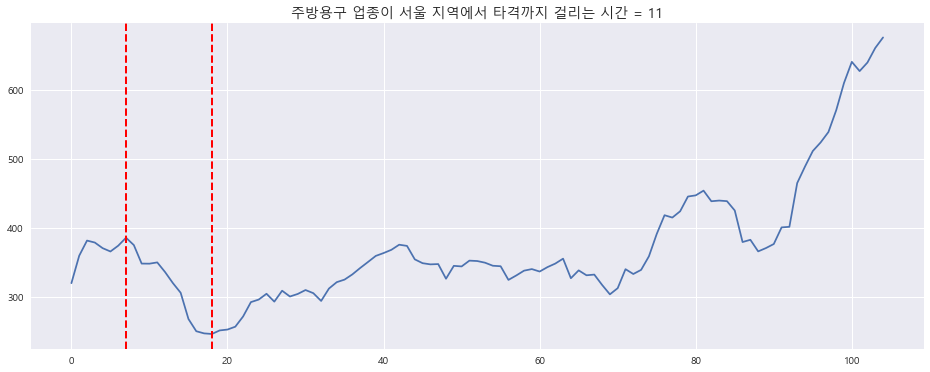

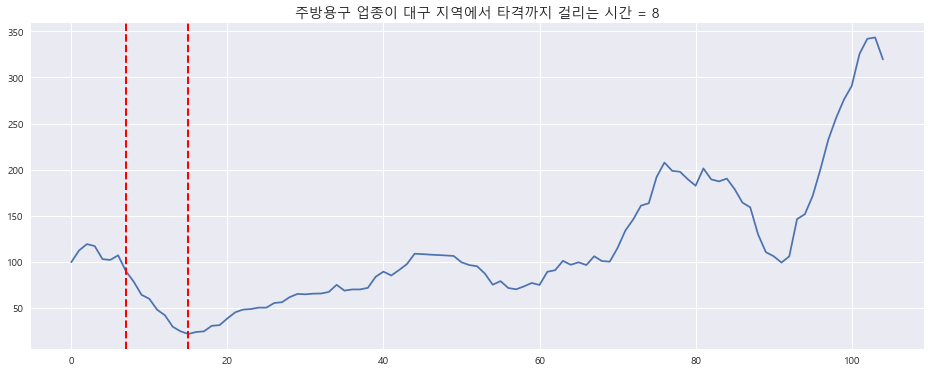

서울의 2020년에 코로나 터지기 전 평균: 352.57142857142856, 터진 후 최소: 245.71 -> r1 = 0.3030915721231766
서울의 2019년에 코로나 터지기 전 평균: 353.92857142857144, 터진 후 최소: 435.71 -> r2 = -0.23106760847628646
주방용구 업종의 서울 Impact index = 0.695
대구의 2020년에 코로나 터지기 전 평균: 94.78571428571429, 터진 후 최소: 21.86 -> r1 = 0.7693745290128109
대구의 2019년에 코로나 터지기 전 평균: 148.14285714285714, 터진 후 최소: 166.29 -> r2 = -0.12249758919961425
주방용구 업종의 대구 Impact index = 1.016
________________________________________________
17


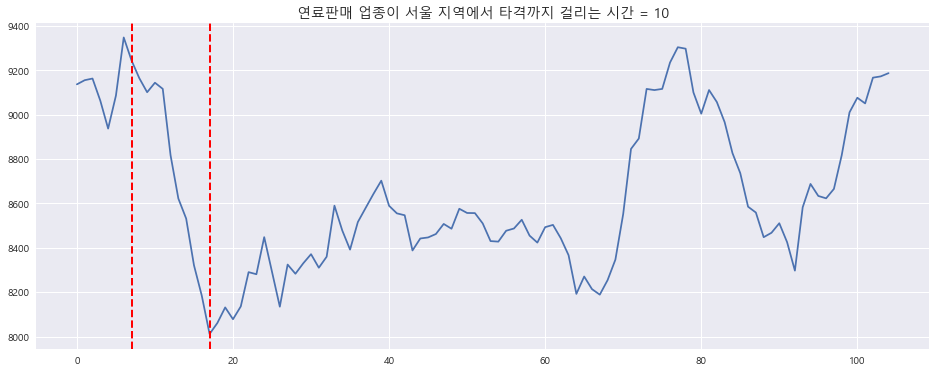

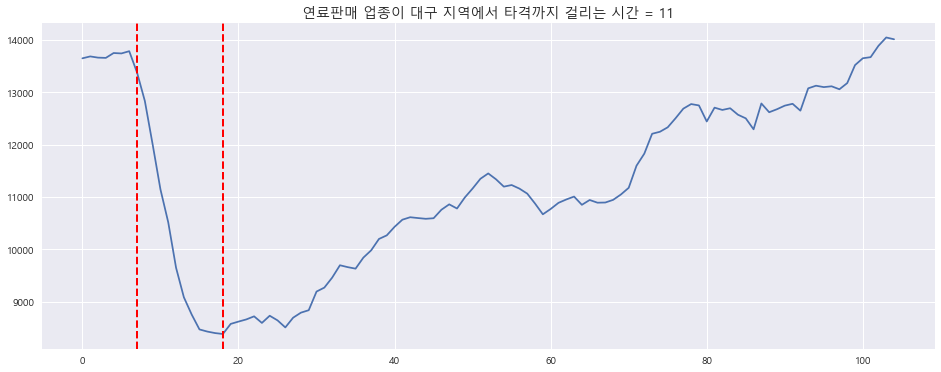

서울의 2020년에 코로나 터지기 전 평균: 9190.857142857143, 터진 후 최소: 8011.71 -> r1 = 0.12829566650087046
서울의 2019년에 코로나 터지기 전 평균: 11223.57142857143, 터진 후 최소: 11140.71 -> r2 = 0.007382804047604042
연료판매 업종의 서울 Impact index = 0.12
대구의 2020년에 코로나 터지기 전 평균: 13517.785714285714, 터진 후 최소: 8383.43 -> r1 = 0.3798222447674756
대구의 2019년에 코로나 터지기 전 평균: 16122.92857142857, 터진 후 최소: 15770.57 -> r2 = 0.02185450179646552
연료판매 업종의 대구 Impact index = 0.35
________________________________________________
17


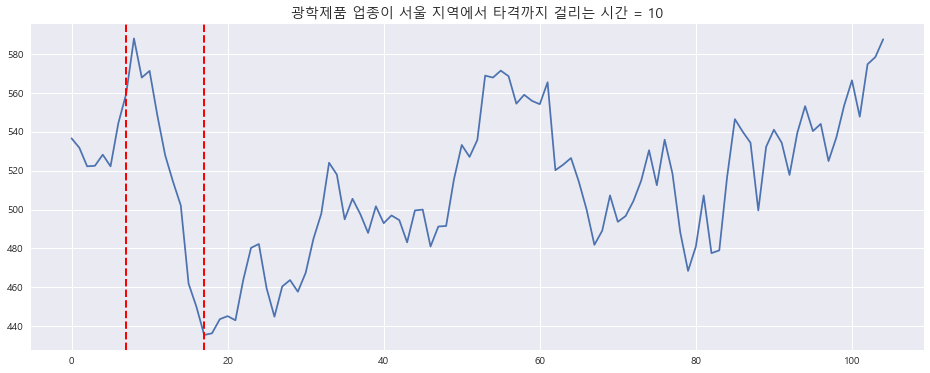

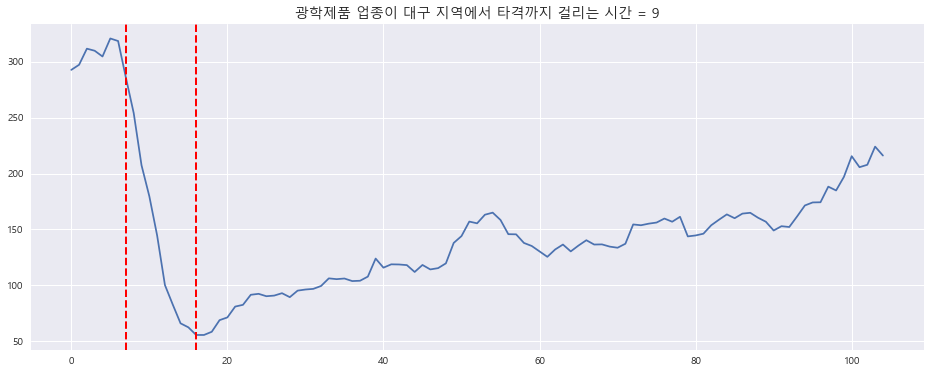

서울의 2020년에 코로나 터지기 전 평균: 548.1428571428571, 터진 후 최소: 435.43 -> r1 = 0.2056267917643992
서울의 2019년에 코로나 터지기 전 평균: 766.4285714285714, 터진 후 최소: 874.86 -> r2 = -0.1414762348555452
광학제품 업종의 서울 Impact index = 0.404
대구의 2020년에 코로나 터지기 전 평균: 289.35714285714283, 터진 후 최소: 55.43 -> r1 = 0.8084374228585534
대구의 2019년에 코로나 터지기 전 평균: 401.7857142857143, 터진 후 최소: 531.86 -> r2 = -0.3237404444444445
광학제품 업종의 대구 Impact index = 1.674
________________________________________________
26


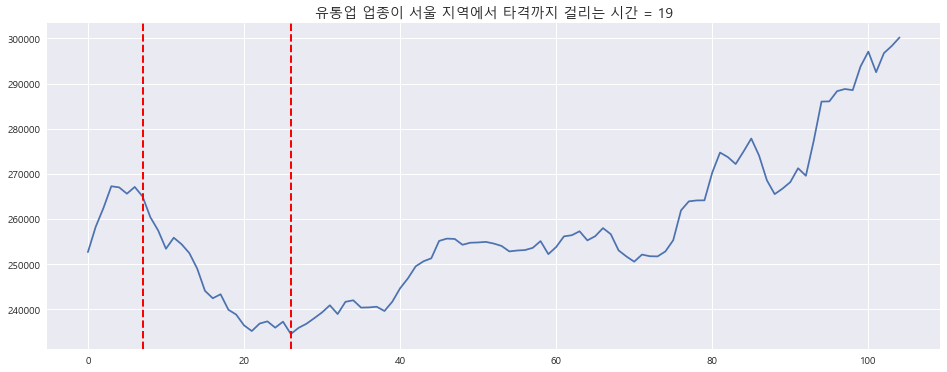

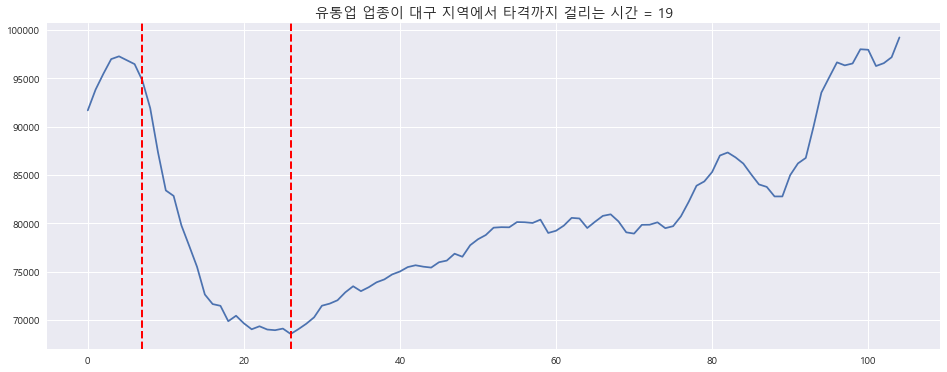

서울의 2020년에 코로나 터지기 전 평균: 258853.07142857142, 터진 후 최소: 234578.71 -> r1 = 0.0937766018946766
서울의 2019년에 코로나 터지기 전 평균: 278200.78571428574, 터진 후 최소: 315285.0 -> r2 = -0.13330017810877076
유통업 업종의 서울 Impact index = 0.262
대구의 2020년에 코로나 터지기 전 평균: 93217.5, 터진 후 최소: 68555.29 -> r1 = 0.2645663099739856
대구의 2019년에 코로나 터지기 전 평균: 92147.28571428571, 터진 후 최소: 96887.29 -> r2 = -0.0514394346938364
유통업 업종의 대구 Impact index = 0.333
________________________________________________
18


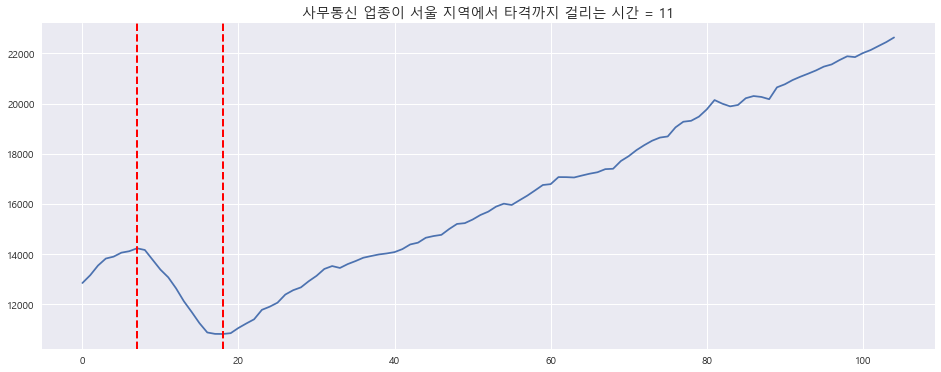

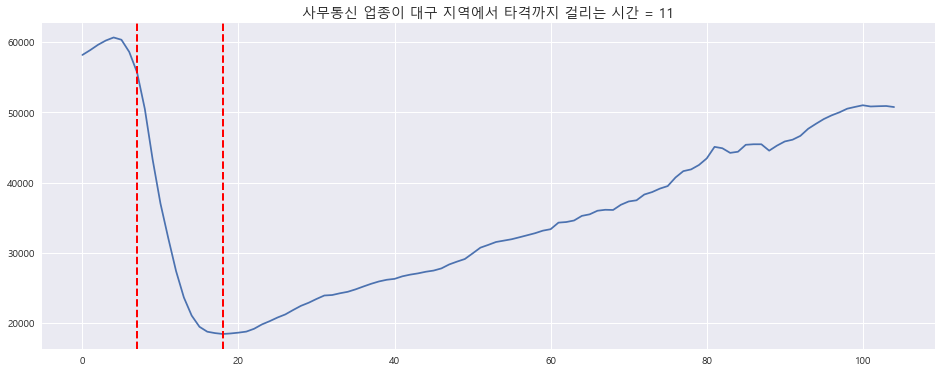

서울의 2020년에 코로나 터지기 전 평균: 13545.357142857143, 터진 후 최소: 10825.29 -> r1 = 0.20081176997917047
서울의 2019년에 코로나 터지기 전 평균: 7221.071428571428, 터진 후 최소: 7808.86 -> r2 = -0.08139908007319845
사무통신 업종의 서울 Impact index = 0.307
대구의 2020년에 코로나 터지기 전 평균: 56955.28571428572, 터진 후 최소: 18454.71 -> r1 = 0.6759789759886828
대구의 2019년에 코로나 터지기 전 평균: 59379.92857142857, 터진 후 최소: 62556.43 -> r2 = -0.05349453098028553
사무통신 업종의 대구 Impact index = 0.771
________________________________________________
18


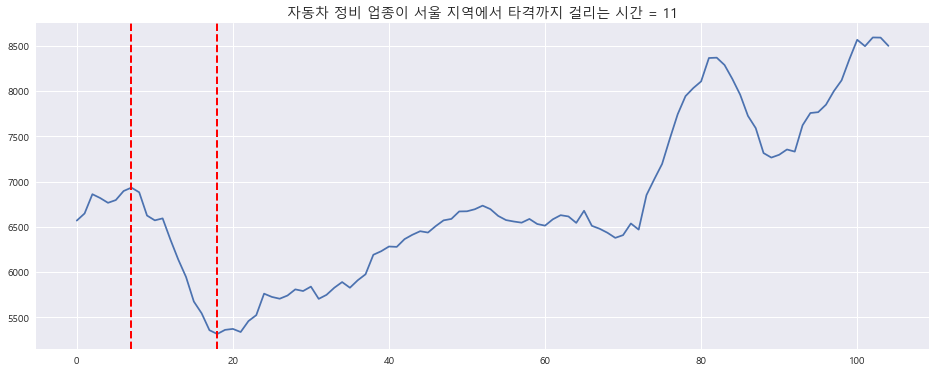

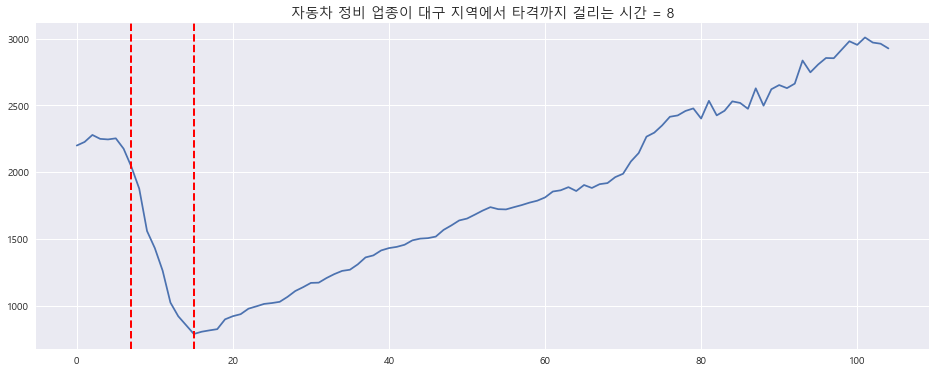

서울의 2020년에 코로나 터지기 전 평균: 6751.642857142857, 터진 후 최소: 5316.43 -> r1 = 0.21257238978872858
서울의 2019년에 코로나 터지기 전 평균: 11476.42857142857, 터진 후 최소: 12831.43 -> r2 = -0.11806821435239943
자동차 정비 업종의 서울 Impact index = 0.375
대구의 2020년에 코로나 터지기 전 평균: 2119.714285714286, 터진 후 최소: 788.71 -> r1 = 0.6279168351529856
대구의 2019년에 코로나 터지기 전 평균: 2701.0, 터진 후 최소: 2862.86 -> r2 = -0.05992595335061093
자동차 정비 업종의 대구 Impact index = 0.732
________________________________________________
21


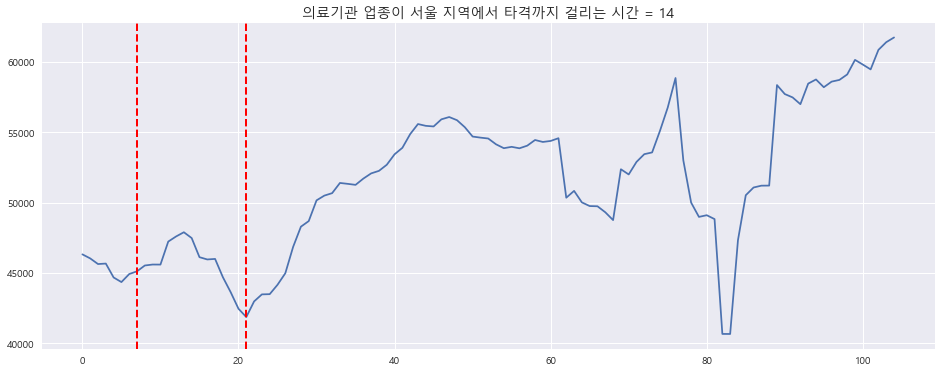

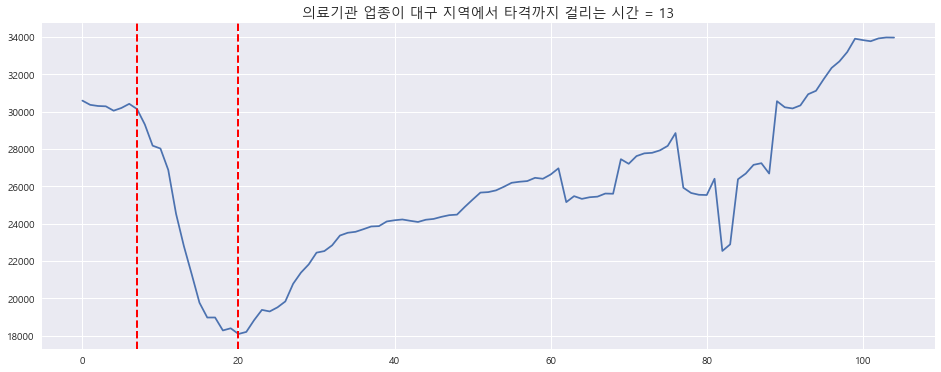

서울의 2020년에 코로나 터지기 전 평균: 45719.5, 터진 후 최소: 41862.86 -> r1 = 0.08435437832872186
서울의 2019년에 코로나 터지기 전 평균: 47862.71428571428, 터진 후 최소: 42267.57 -> r2 = 0.11689985344989683
의료기관 업종의 서울 Impact index = -0.029
대구의 2020년에 코로나 터지기 전 평균: 30361.64285714286, 터진 후 최소: 18095.86 -> r1 = 0.40398943215476296
대구의 2019년에 코로나 터지기 전 평균: 30497.35714285714, 터진 후 최소: 26463.0 -> r2 = 0.13228546735899827
의료기관 업종의 대구 Impact index = 0.24
________________________________________________
18


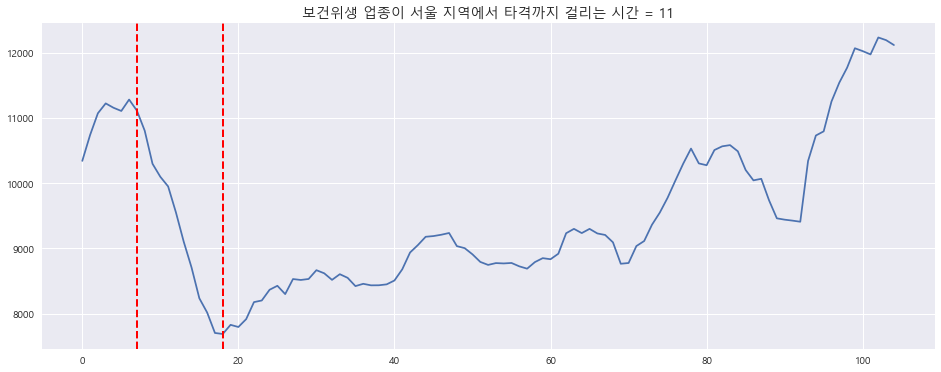

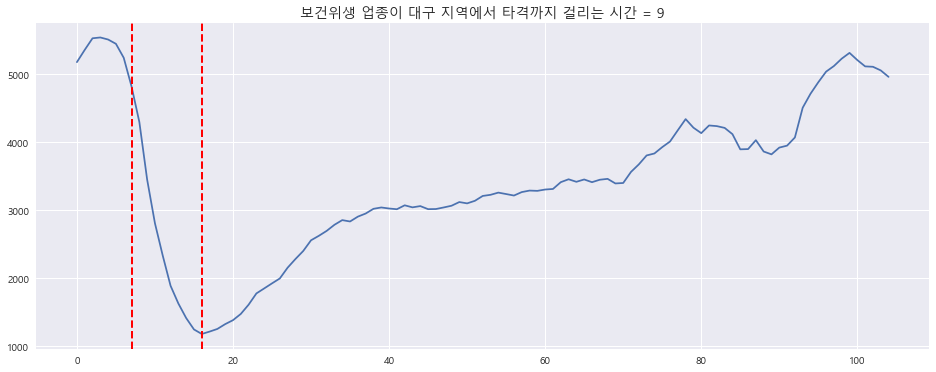

서울의 2020년에 코로나 터지기 전 평균: 10729.07142857143, 터진 후 최소: 7685.71 -> r1 = 0.2836556219084331
서울의 2019년에 코로나 터지기 전 평균: 15399.785714285714, 터진 후 최소: 16994.57 -> r2 = -0.10355886213630061
보건위생 업종의 서울 Impact index = 0.432
대구의 2020년에 코로나 터지기 전 평균: 5002.214285714285, 터진 후 최소: 1183.86 -> r1 = 0.7633328097556796
대구의 2019년에 코로나 터지기 전 평균: 6468.142857142857, 터진 후 최소: 7329.43 -> r2 = -0.13315833646222153
보건위생 업종의 대구 Impact index = 1.034
________________________________________________
18


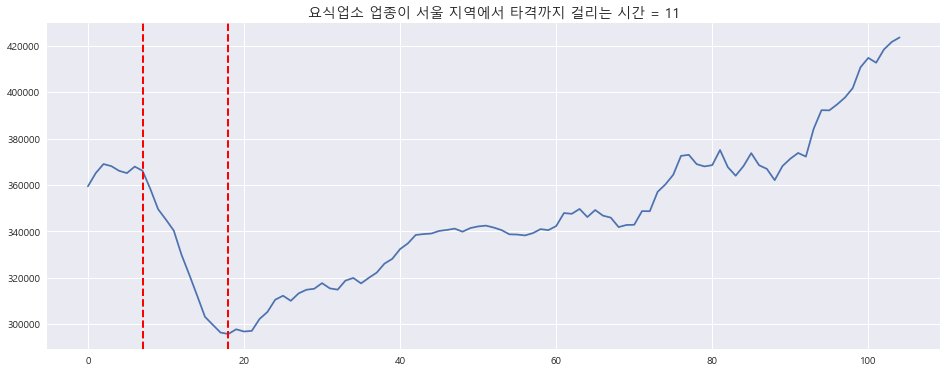

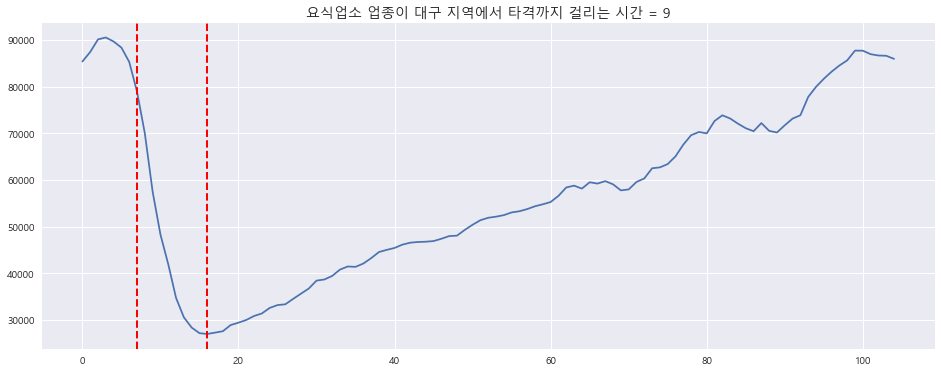

서울의 2020년에 코로나 터지기 전 평균: 362738.85714285716, 터진 후 최소: 295756.71 -> r1 = 0.1846566636683139
서울의 2019년에 코로나 터지기 전 평균: 372230.14285714284, 터진 후 최소: 390711.29 -> r2 = -0.04964978655678072
요식업소 업종의 서울 Impact index = 0.247
대구의 2020년에 코로나 터지기 전 평균: 82127.57142857143, 터진 후 최소: 27055.0 -> r1 = 0.6705734806303086
대구의 2019년에 코로나 터지기 전 평균: 89141.71428571429, 터진 후 최소: 99606.0 -> r2 = -0.11738932550417308
요식업소 업종의 대구 Impact index = 0.893
________________________________________________
8


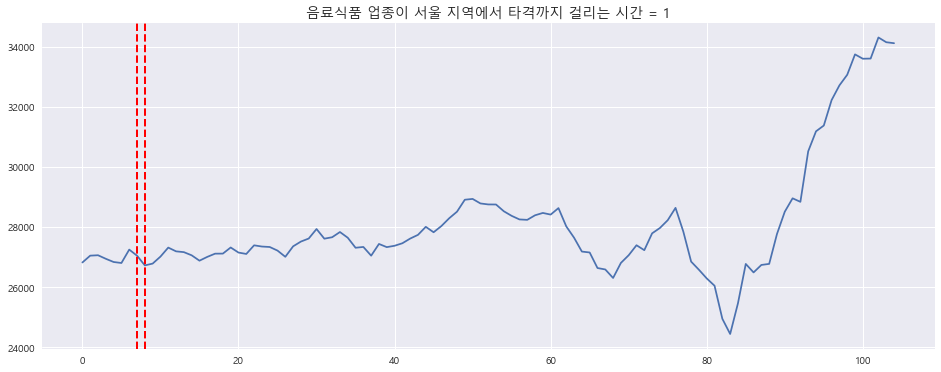

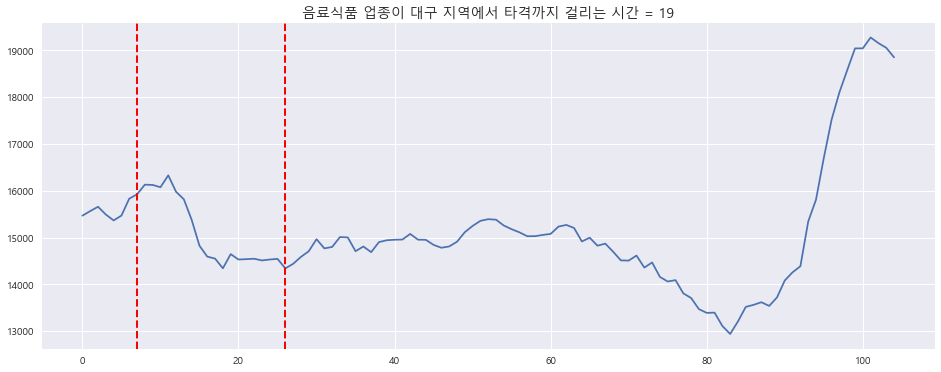

서울의 2020년에 코로나 터지기 전 평균: 26938.928571428572, 터진 후 최소: 26728.43 -> r1 = 0.007813917723952353
서울의 2019년에 코로나 터지기 전 평균: 27793.785714285714, 터진 후 최소: 28333.86 -> r2 = -0.019431476203570726
음료식품 업종의 서울 Impact index = 0.028
대구의 2020년에 코로나 터지기 전 평균: 15696.0, 터진 후 최소: 14340.57 -> r1 = 0.08635512232415904
대구의 2019년에 코로나 터지기 전 평균: 14584.07142857143, 터진 후 최소: 15932.43 -> r2 = -0.09245419415507129
음료식품 업종의 대구 Impact index = 0.197
________________________________________________
16


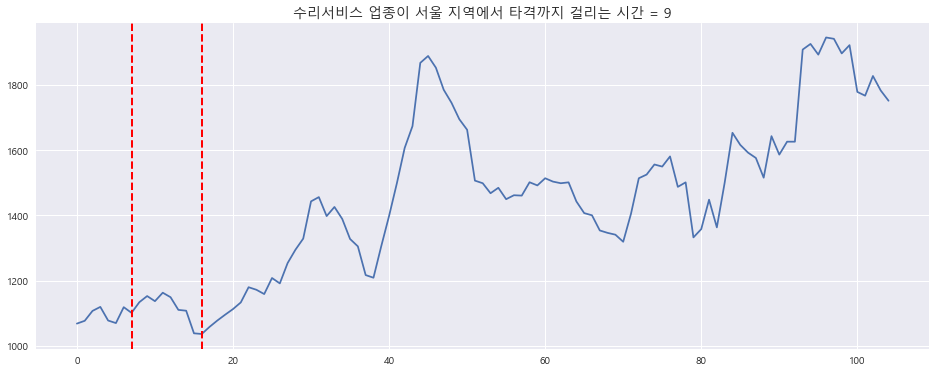

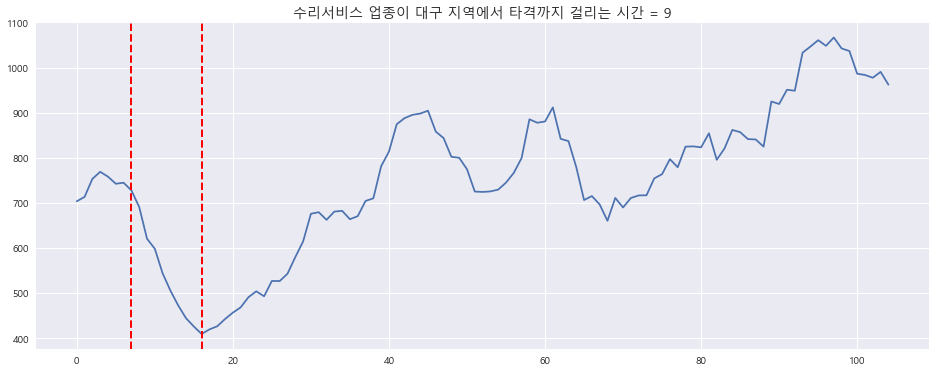

서울의 2020년에 코로나 터지기 전 평균: 1084.5, 터진 후 최소: 1036.14 -> r1 = 0.044591977869986074
서울의 2019년에 코로나 터지기 전 평균: 1211.0, 터진 후 최소: 1362.43 -> r2 = -0.125045417010735
수리서비스 업종의 서울 Impact index = 0.194
대구의 2020년에 코로나 터지기 전 평균: 715.6428571428571, 터진 후 최소: 409.43 -> r1 = 0.4278850184649166
대구의 2019년에 코로나 터지기 전 평균: 784.8571428571429, 터진 후 최소: 769.14 -> r2 = 0.02002548234437574
수리서비스 업종의 대구 Impact index = 0.4
________________________________________________
37


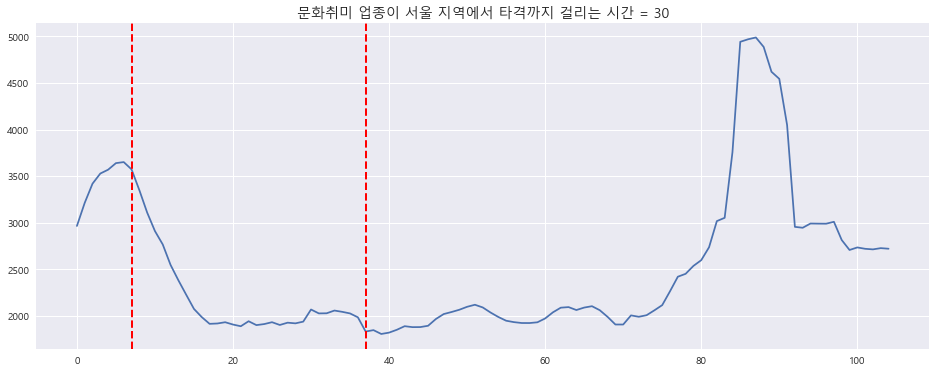

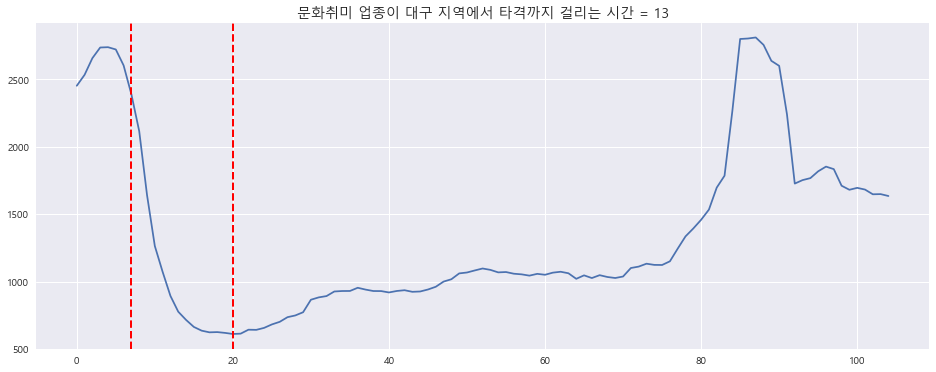

서울의 2020년에 코로나 터지기 전 평균: 3270.0714285714284, 터진 후 최소: 1834.43 -> r1 = 0.43902448614053863
서울의 2019년에 코로나 터지기 전 평균: 4238.571428571428, 터진 후 최소: 3112.29 -> r2 = 0.26572194135490396
문화취미 업종의 서울 Impact index = 0.137
대구의 2020년에 코로나 터지기 전 평균: 2420.214285714286, 터진 후 최소: 611.14 -> r1 = 0.7474851695540538
대구의 2019년에 코로나 터지기 전 평균: 3634.0714285714284, 터진 후 최소: 3588.71 -> r2 = 0.012482261139611175
문화취미 업종의 대구 Impact index = 0.726
________________________________________________
19


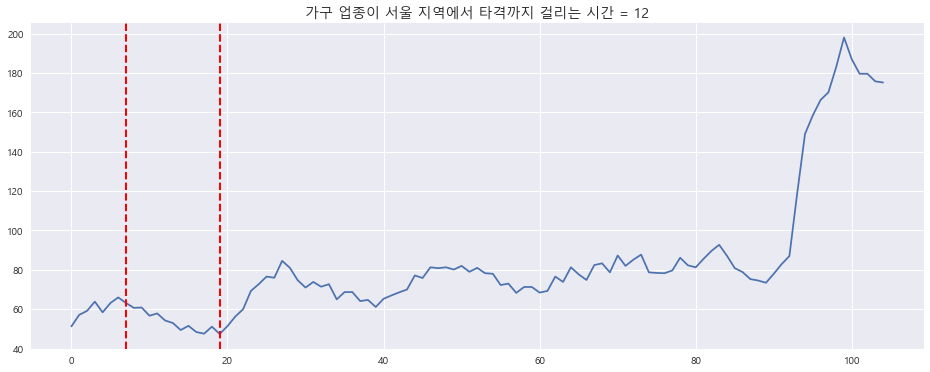

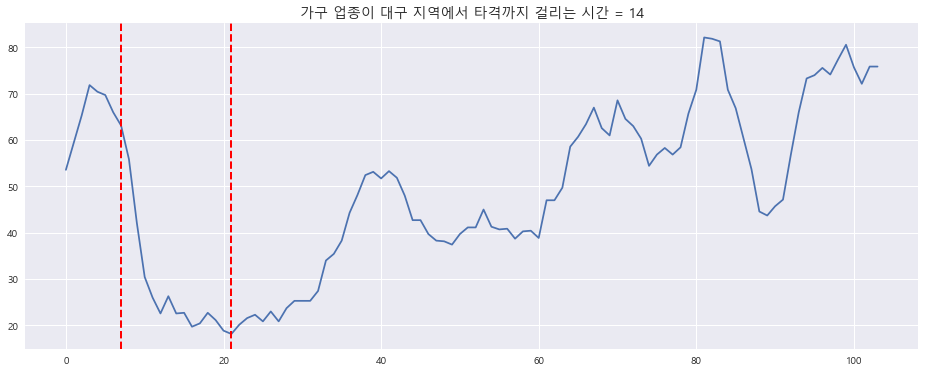

서울의 2020년에 코로나 터지기 전 평균: 57.214285714285715, 터진 후 최소: 47.43 -> r1 = 0.1710112359550562
서울의 2019년에 코로나 터지기 전 평균: 99.85714285714286, 터진 후 최소: 116.71 -> r2 = -0.16876967095851206
가구 업종의 서울 Impact index = 0.409
대구의 2020년에 코로나 터지기 전 평균: 58.357142857142854, 터진 후 최소: 18.14 -> r1 = 0.6891554467564259
대구의 2019년에 코로나 터지기 전 평균: 68.71428571428571, 터진 후 최소: 76.71 -> r2 = -0.11636174636174637
가구 업종의 대구 Impact index = 0.912
________________________________________________
16


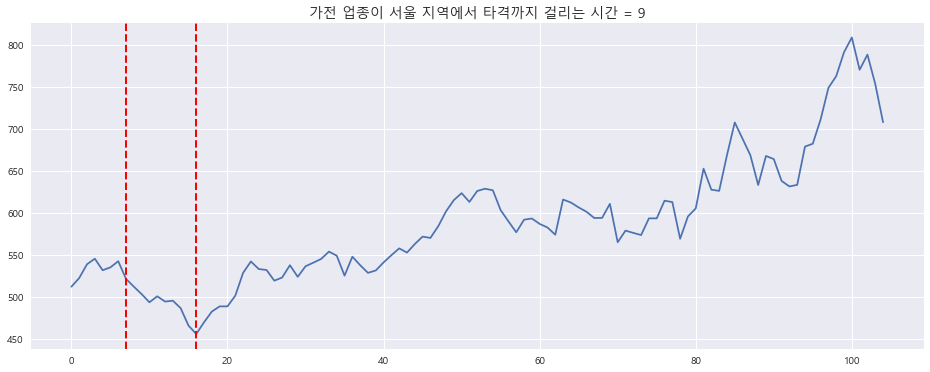

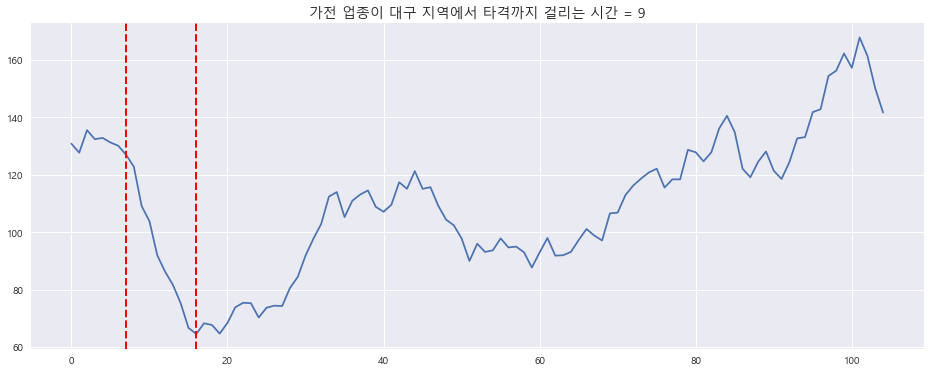

서울의 2020년에 코로나 터지기 전 평균: 516.6428571428571, 터진 후 최소: 455.71 -> r1 = 0.11793999723489561
서울의 2019년에 코로나 터지기 전 평균: 877.2142857142857, 터진 후 최소: 931.0 -> r2 = -0.061314225225958856
가전 업종의 서울 Impact index = 0.191
대구의 2020년에 코로나 터지기 전 평균: 128.92857142857142, 터진 후 최소: 64.57 -> r1 = 0.49918005540166205
대구의 2019년에 코로나 터지기 전 평균: 238.21428571428572, 터진 후 최소: 216.29 -> r2 = 0.09203598200899557
가전 업종의 대구 Impact index = 0.373
________________________________________________
18


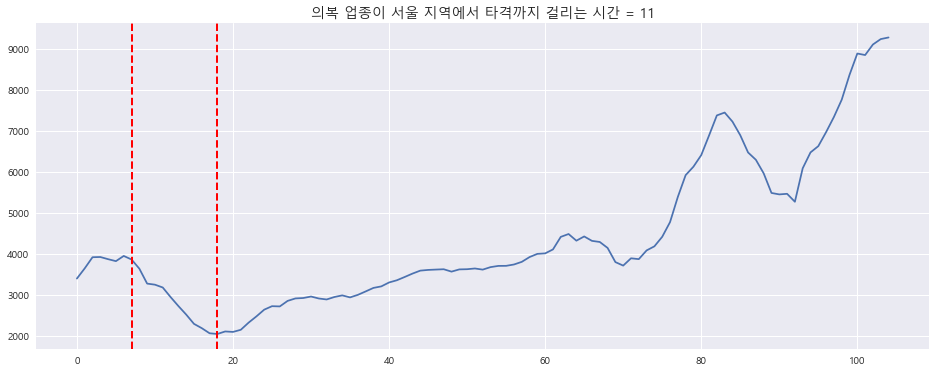

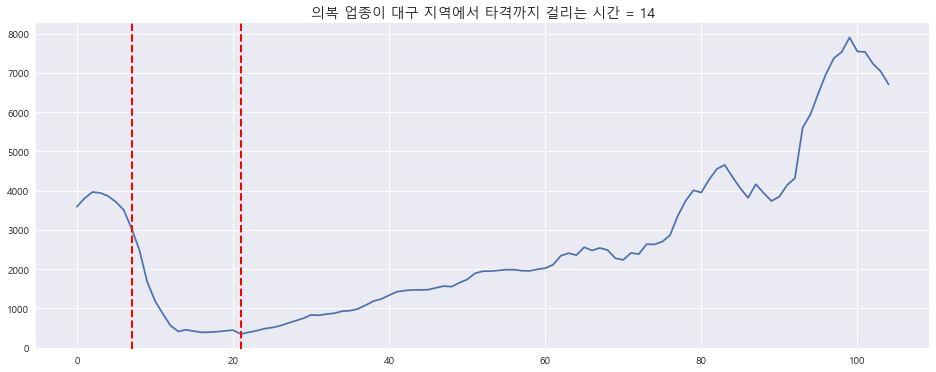

서울의 2020년에 코로나 터지기 전 평균: 3625.214285714286, 터진 후 최소: 2038.29 -> r1 = 0.4377463401178256
서울의 2019년에 코로나 터지기 전 평균: 7107.642857142857, 터진 후 최소: 9463.14 -> r2 = -0.3314034188549549
의복 업종의 서울 Impact index = 1.15
대구의 2020년에 코로나 터지기 전 평균: 3318.5714285714284, 터진 후 최소: 350.43 -> r1 = 0.8944033577270771
대구의 2019년에 코로나 터지기 전 평균: 4846.928571428572, 터진 후 최소: 6004.14 -> r2 = -0.23875149210840446
의복 업종의 대구 Impact index = 1.489
________________________________________________
17


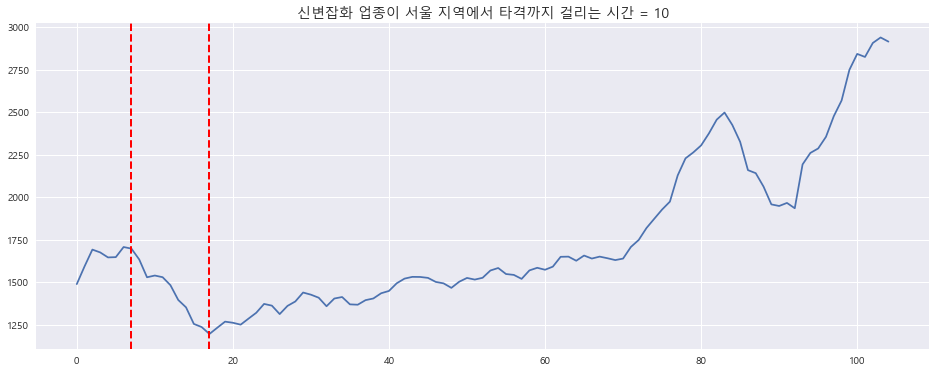

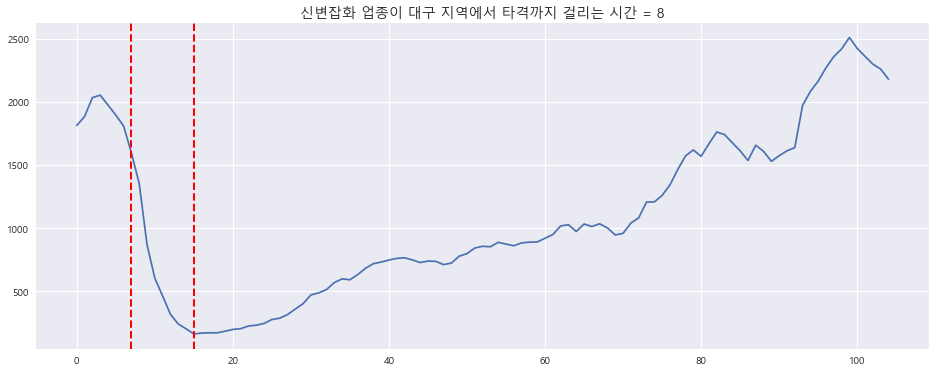

서울의 2020년에 코로나 터지기 전 평균: 1592.0714285714287, 터진 후 최소: 1194.29 -> r1 = 0.24985149625375752
서울의 2019년에 코로나 터지기 전 평균: 2756.214285714286, 터진 후 최소: 3244.29 -> r2 = -0.17708191878093654
신변잡화 업종의 서울 Impact index = 0.519
대구의 2020년에 코로나 터지기 전 평균: 1704.7142857142858, 터진 후 최소: 163.71 -> r1 = 0.9039663119081538
대구의 2019년에 코로나 터지기 전 평균: 2123.9285714285716, 터진 후 최소: 2652.29 -> r2 = -0.24876610055490153
신변잡화 업종의 대구 Impact index = 1.534
________________________________________________
17


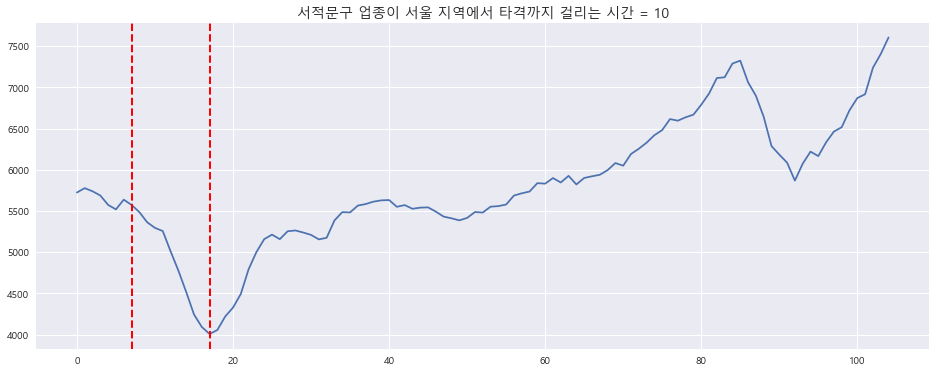

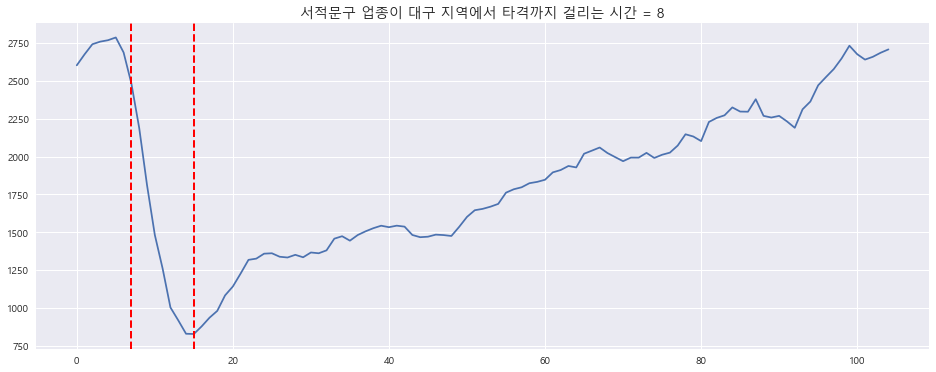

서울의 2020년에 코로나 터지기 전 평균: 5648.928571428572, 터진 후 최소: 4007.86 -> r1 = 0.2905097047480559
서울의 2019년에 코로나 터지기 전 평균: 6996.785714285715, 터진 후 최소: 8771.86 -> r2 = -0.2536985350416007
서적문구 업종의 서울 Impact index = 0.729
대구의 2020년에 코로나 터지기 전 평균: 2542.1428571428573, 터진 후 최소: 828.0 -> r1 = 0.6742905310480473
대구의 2019년에 코로나 터지기 전 평균: 3217.785714285714, 터진 후 최소: 3555.57 -> r2 = -0.10497413927057211
서적문구 업종의 대구 Impact index = 0.871
________________________________________________
17


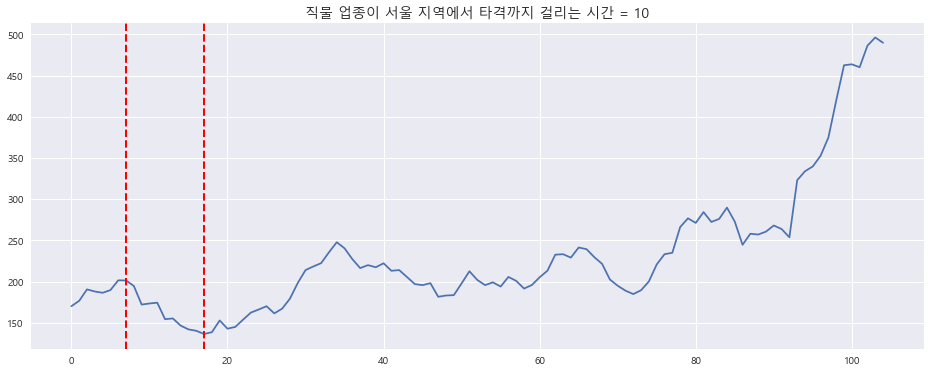

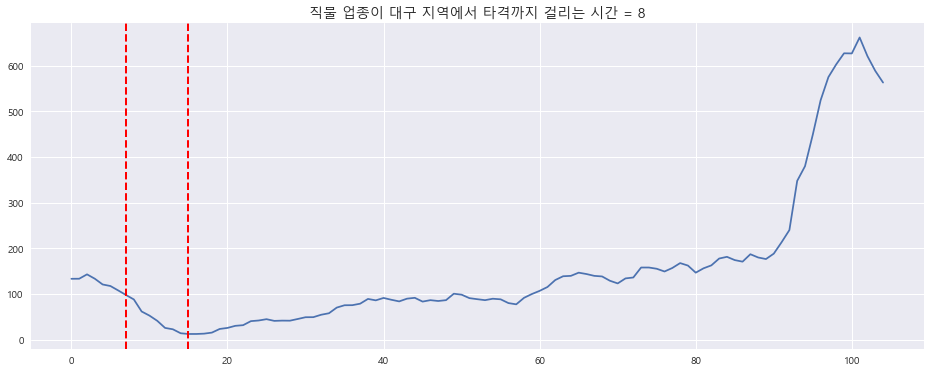

서울의 2020년에 코로나 터지기 전 평균: 185.64285714285714, 터진 후 최소: 136.29 -> r1 = 0.26584840323201236
서울의 2019년에 코로나 터지기 전 평균: 249.78571428571428, 터진 후 최소: 260.71 -> r2 = -0.04373462968258503
직물 업종의 서울 Impact index = 0.324
대구의 2020년에 코로나 터지기 전 평균: 115.35714285714286, 터진 후 최소: 12.14 -> r1 = 0.8947616099071207
대구의 2019년에 코로나 터지기 전 평균: 179.28571428571428, 터진 후 최소: 219.14 -> r2 = -0.22229482071713144
직물 업종의 대구 Impact index = 1.436
________________________________________________
16


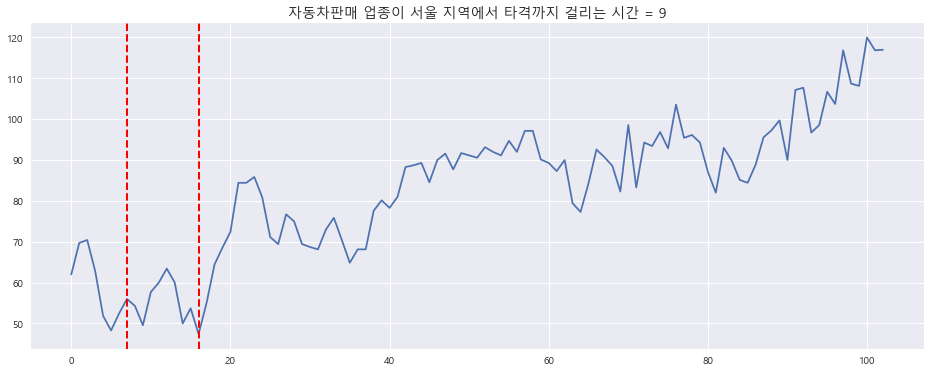

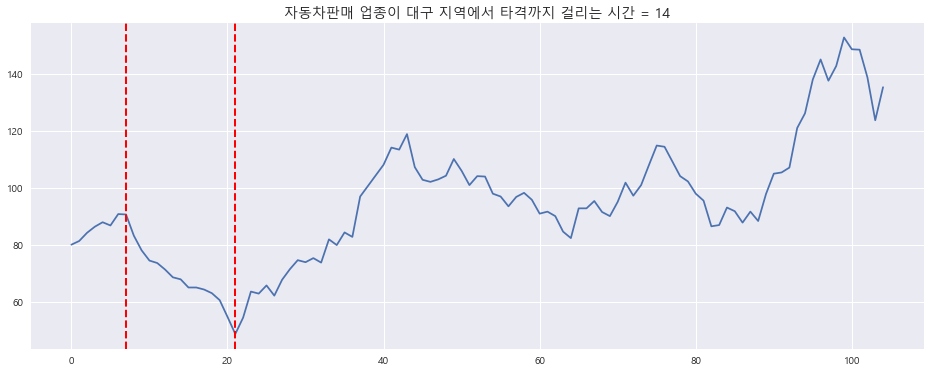

서울의 2020년에 코로나 터지기 전 평균: 62.0, 터진 후 최소: 47.43 -> r1 = 0.23500000000000001
서울의 2019년에 코로나 터지기 전 평균: 66.28571428571429, 터진 후 최소: 68.86 -> r2 = -0.03883620689655162
자동차판매 업종의 서울 Impact index = 0.285
대구의 2020년에 코로나 터지기 전 평균: 85.42857142857143, 터진 후 최소: 48.86 -> r1 = 0.42806020066889633
대구의 2019년에 코로나 터지기 전 평균: 80.42857142857143, 터진 후 최소: 79.14 -> r2 = 0.016021314387211386
자동차판매 업종의 대구 Impact index = 0.406
________________________________________________


In [59]:
impact_index_dict_Seoul, impact_index_dict_Daegu = impact_index(offline, group_col='MCT_CAT_CD', val='USE_CNT')

In [147]:
sorted(impact_index_dict_Seoul.items(), key = lambda item: item[1])


[('의료기관', -0.029),
 ('음료식품', 0.028),
 ('연료판매', 0.12),
 ('문화취미', 0.137),
 ('가전', 0.191),
 ('수리서비스', 0.194),
 ('전기', 0.214),
 ('숙박', 0.219),
 ('레저업소', 0.228),
 ('요식업소', 0.247),
 ('유통업', 0.262),
 ('자동차판매', 0.285),
 ('사무통신', 0.307),
 ('직물', 0.324),
 ('자동차 정비', 0.375),
 ('광학제품', 0.404),
 ('가구', 0.409),
 ('보건위생', 0.432),
 ('신변잡화', 0.519),
 ('주방용구', 0.695),
 ('서적문구', 0.729),
 ('의복', 1.15),
 ('레저용품', 2.175)]

In [148]:
sorted(impact_index_dict_Daegu.items(), key = lambda item: item[1])

[('전기', 0.039),
 ('음료식품', 0.197),
 ('의료기관', 0.24),
 ('유통업', 0.333),
 ('연료판매', 0.35),
 ('가전', 0.373),
 ('수리서비스', 0.4),
 ('자동차판매', 0.406),
 ('문화취미', 0.726),
 ('자동차 정비', 0.732),
 ('사무통신', 0.771),
 ('서적문구', 0.871),
 ('요식업소', 0.893),
 ('가구', 0.912),
 ('레저업소', 0.923),
 ('주방용구', 1.016),
 ('숙박', 1.022),
 ('보건위생', 1.034),
 ('직물', 1.436),
 ('의복', 1.489),
 ('신변잡화', 1.534),
 ('광학제품', 1.674),
 ('레저용품', 1.75)]

In [27]:
sorted(impact_index_dict.items(), key = lambda item: item[1])


[('전기', 0.027),
 ('의료기관', 0.07),
 ('가전', 0.229),
 ('음료식품', 0.232),
 ('연료판매', 0.269),
 ('유통업', 0.284),
 ('수리서비스', 0.284),
 ('레저업소', 0.331),
 ('요식업소', 0.351),
 ('숙박', 0.386),
 ('자동차판매', 0.419),
 ('자동차 정비', 0.445),
 ('문화취미', 0.446),
 ('주방용구', 0.582),
 ('가구', 0.591),
 ('보건위생', 0.621),
 ('사무통신', 0.68),
 ('직물', 0.72),
 ('광학제품', 0.772),
 ('서적문구', 0.825),
 ('신변잡화', 1.033),
 ('의복', 1.439),
 ('레저용품', 2.162)]

# Resilience_index

In [ ]:
def graph_corona_time_plot(covid):
    ax = covid['Total '].plot(figsize=(16, 6))
    ax.axvline(x=20, color='r', linewidth=2, linestyle='--')
    plt.text(x=7, 
             y=covid['Total '].max()*0.9, 
             s='코로나 타격 \n{}주차 {}요일'.format(covid['WEEK_NUM'][20], covid['WEEKDAY'][20]), 
             fontsize=14)
    plt.title("코로나 신규확진자수 (한국)", fontsize=14)
    plt.show()

In [40]:
def resilience_index(df, group_col='MCT_CAT_CD', val='USE_CNT', window = 3):
    cat_list = df[group_col].unique().tolist()
    resilience_index_dict = {}
    
    for cat in cat_list:
        tmp_df = df.loc[offline[group_col]== cat]
        
        tmp_2019 = tmp_df.query('YEAR==2019').reset_index(drop=True)
        tmp_2020 = tmp_df.query('YEAR==2020').reset_index(drop=True)
        tmp_2019 = tmp_2019.groupby(['STD_DD','YEAR','MONTH', 'DAY', 'WEEK_NUM','WEEKDAY'])[val].sum().reset_index()
        tmp_2020 = tmp_2020.groupby(['STD_DD','YEAR','MONTH', 'DAY', 'WEEK_NUM','WEEKDAY'])[val].sum().reset_index()
        
        ### 코로나 터지기 2주전 시점의 평균
        pre_2019 = tmp_2019.iloc[7:21,6].mean()
        pre_2020 = tmp_2020.iloc[6:20,6].mean()
        
        ### 이동 평균선 (7일) 구하기
        tmp_2019['USE_CNT'] = round(tmp_2019['USE_CNT'].rolling(window=7, center = True).mean(),2)
        tmp_2020['USE_CNT'] = round(tmp_2020['USE_CNT'].rolling(window=7, center = True).mean(),2)
        
        ### 두 데이터프레임의 index 맞추기.
        tmp_2019 = tmp_2019.loc[tmp_2019['WEEK_NUM']>6, ]
        tmp_2019 = tmp_2019.loc[tmp_2019['WEEK_NUM']<22, ].reset_index(drop = True)
        tmp_2020 = tmp_2020.loc[tmp_2020['WEEK_NUM']>6, ]
        tmp_2020 = tmp_2020.loc[tmp_2020['WEEK_NUM']<22, ].reset_index(drop = True)
        
        ### 가장 낮아진 시점 구하기.
        T = np.argmin(tmp_2020['USE_CNT'])
        
        ### R_i 구하기.
        r_list = tmp_2020['USE_CNT'] / tmp_2019['USE_CNT']
    
        
        ### Resilience index 계산
        Resilience_index = 0
        for i in range(window):
            pre_r = r_list[(T + 7*i)]
            post_r = r_list[(T + 7*(i+1))]
            slope = post_r - pre_r
            Resilience_index = slope * (1/((i+1)** 0.5)) + Resilience_index
        
        ### R_i 그래프 그리기
        ax = r_list.plot(figsize=(16, 6))
        for j in range(window + 1):
            ax.axvline(x=(T + 7*j), color='r', linewidth=2, linestyle='--')
        plt.title("{} 업종의 Resilience index = {}".format(cat,Resilience_index), fontsize=14)
        plt.show()
        
        
        resilience_index_dict[cat] = Resilience_index
        resilience_index_dict = sorted(resilience_index_dict.items(), key = lambda item: item[1])
    return  resilience_index_dict

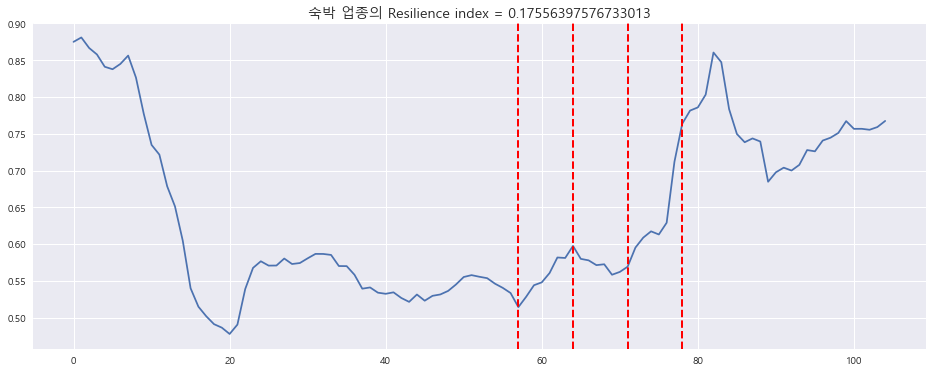

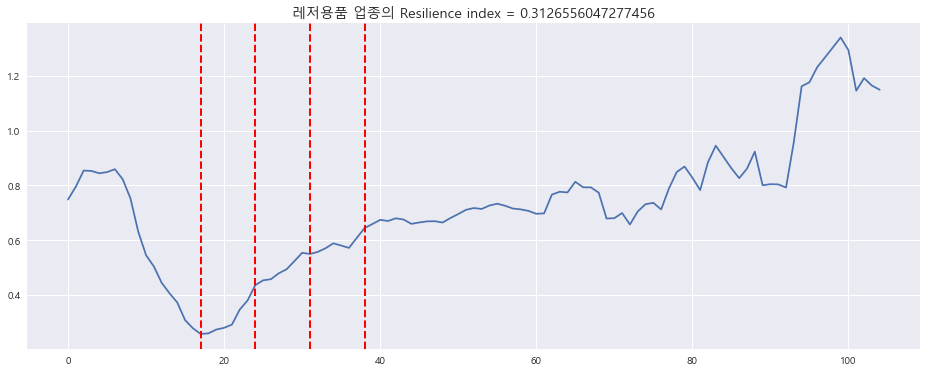

TypeError: list indices must be integers or slices, not str

In [41]:
resilience_index_dict = resilience_index(offline, group_col='MCT_CAT_CD', val='USE_CNT', window = 3)


In [39]:
resilience_index_dict.keys()[0]

TypeError: 'dict_keys' object is not subscriptable

# ______

In [132]:
r_list = tmp_2020['USE_CNT'] / tmp_2019['USE_CNT']
r_list

0      1.207715
1      1.512633
2      1.137349
3      0.974390
4      0.980797
         ...   
107    1.005514
108    1.023254
109    0.984172
110    0.945666
111    0.907830
Name: USE_CNT, Length: 112, dtype: float64